# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import RocCurveDisplay

warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
"""!pip install catboost
!pip install imblearn
!pip install tensorflow"""
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')


# Data exploataion

In [ ]:
dataset.head()
#check the first 5 row of the data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
dataset.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# Display rows where stroke is 0
stroke_zero_rows = dataset[dataset['stroke'] == 0]
stroke_zero_rows.head()  # Shows the first 5 rows



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [ ]:
#check the type of data in th columns
dataset.dtypes


,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [ ]:
dataset.shape
# this return the number of rows and columns  in the dataset

(5110, 12)

In [ ]:
dataset.describe()
#this functuon will return count, mean, standard deviation, minimum and maximum values and the quantiles of the data of the numerical values

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 **checking all unique values**

In [ ]:
dataset.nunique()

,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


**Checking outliers**


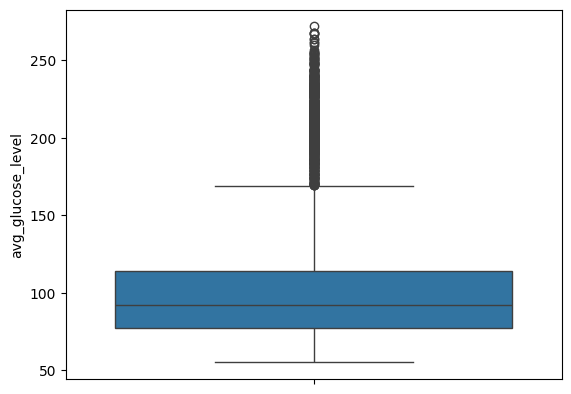

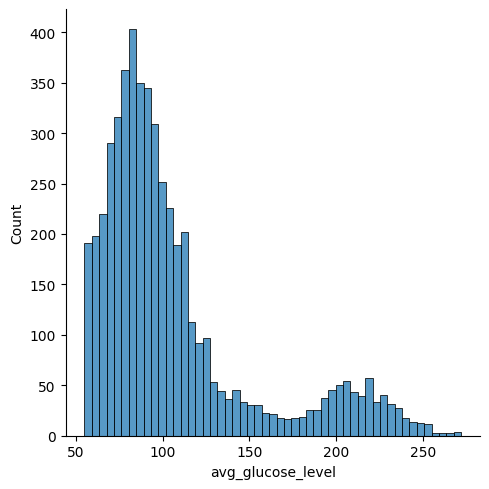

In [ ]:

# Box plot
sns.boxplot(dataset.avg_glucose_level)

# Distribution plot
sns.displot(dataset.avg_glucose_level)


<Axes: ylabel='bmi'>

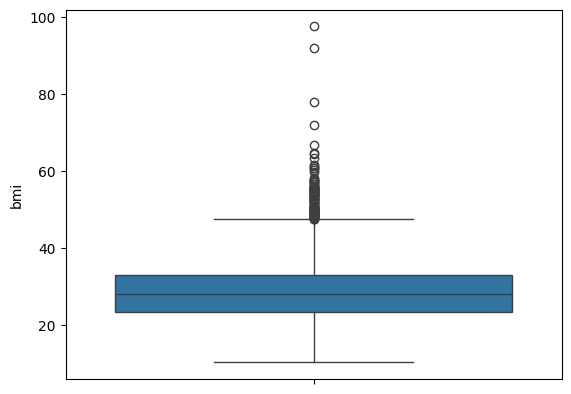

In [ ]:

sns.boxplot(dataset.bmi)

In [ ]:
import pandas as pd

# Define a function to cap outliers
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df

# Apply to your columns
dataset = cap_outliers_iqr(dataset, 'avg_glucose_level')
dataset = cap_outliers_iqr(dataset, 'bmi')


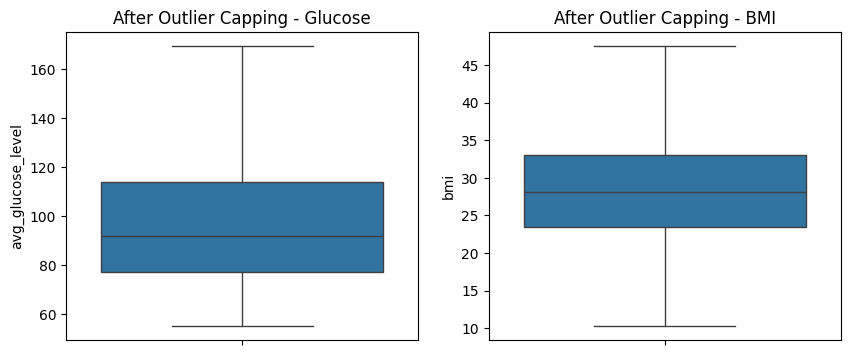

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(dataset['avg_glucose_level'])
plt.title("After Outlier Capping - Glucose")

plt.subplot(1,2,2)
sns.boxplot(dataset['bmi'])
plt.title("After Outlier Capping - BMI")
plt.show()


**Investigate into Age, Average Glucose Level, BMI**


Further investigate into Age, Average Glucose Level, BMI to spot for any corelation

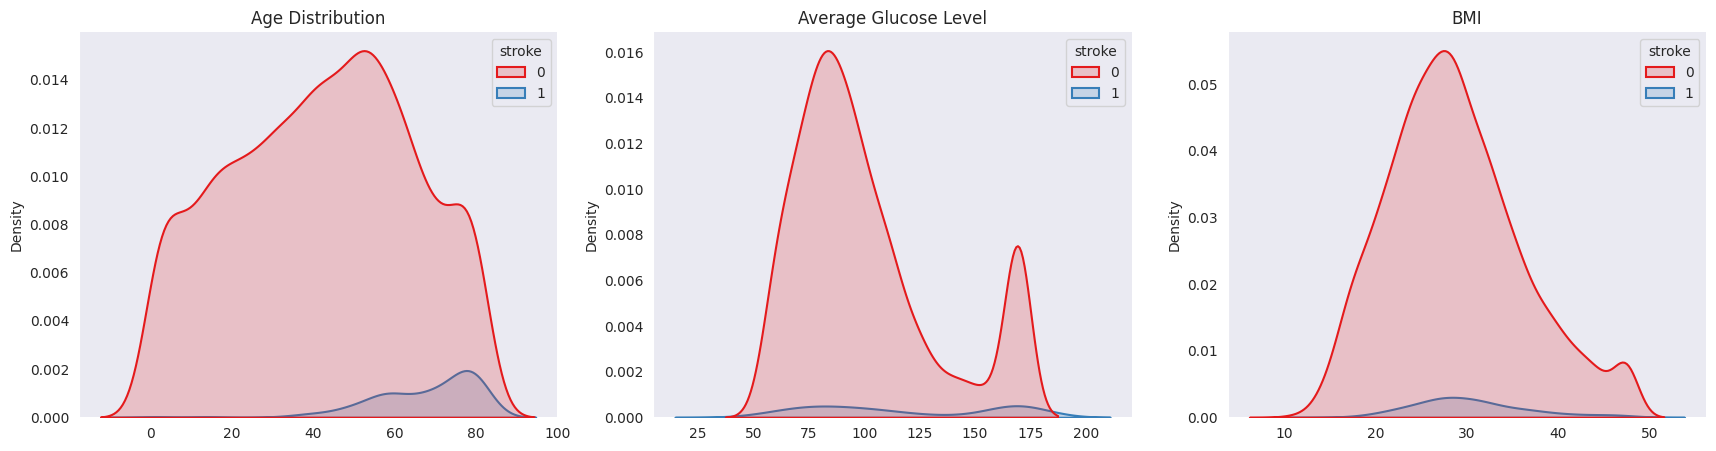

In [ ]:

sns.set_style('dark')

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x='age', alpha=0.2, palette="Set1", label='Smoker', data =dataset, fill=True, linewidth=1.5, hue='stroke');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age Distribution');

plt.subplot(1,3,2)
sns.kdeplot(x=dataset['avg_glucose_level'], alpha=0.2, palette="Set1", label='avg_glucose_level',linewidth=1.5, fill=True, hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Average Glucose Level');

plt.subplot(1,3,3)
sns.kdeplot(x='bmi', alpha=0.2, palette="Set1", label='BMI',data = dataset, shade=True, linewidth=1.5, fill=True, hue='stroke');
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('BMI');

## Cleaning the data

**checking for null value**

In [ ]:
dataset.isnull().sum()
#this function will retun columns and it null sum od it null value

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
len(dataset.bmi)

5110

**Cleaning the data**

In [ ]:
#dro all bmi rows with null values
dataset = dataset.dropna()


In [ ]:
#drop the id colums
dataset = dataset.drop('id', axis=1)
#drop the other in the gender
dataset.drop(dataset.loc[dataset['gender']=='Other'].index, inplace=True)
dataset.age = dataset.age.round().astype('int')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,169.3575,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.0800,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.2000,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.9900,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.2900,25.6,formerly smoked,0


## Relationship analysis

In [ ]:
"""corre = dataset.corr()
#heatmaap aloww visualisation that uses color to show how a value of interest changes depending on the values of two other variables.
sns.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns,annot=True)"""

'corre = dataset.corr()\n#heatmaap aloww visualisation that uses color to show how a value of interest changes depending on the values of two other variables.\nsns.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns,annot=True)'

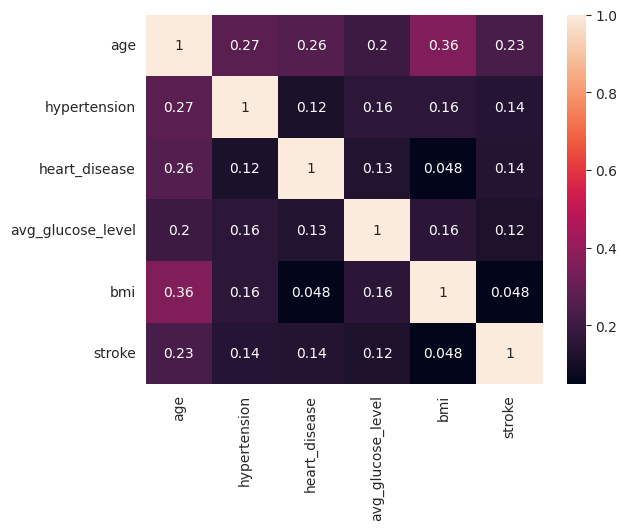

'dataset_encoded = pd.get_dummies(dataset, columns=[\'gender\', \'ever_married\', \'work_type\', \'Residence_type\', \'smoking_status\'])\n\n# Calculate and display the correlation matrix for the encoded dataset\ncorre_encoded = dataset_encoded.corr()\nplt.figure(figsize=(12, 8)) # Adjust figure size for better readability with more columns\nsns.heatmap(corre_encoded, xticklabels=corre_encoded.columns, yticklabels=corre_encoded.columns, annot=True, fmt=".2f")\nplt.title(\'Correlation Matrix (with One-Hot Encoded Categorical Features)\')\nplt.show()'

In [ ]:
# Select only numerical columns for correlation
numerical_dataset = dataset.select_dtypes(include=np.number)

# Calculate and display the correlation matrix for numerical columns
corre = numerical_dataset.corr()
sns.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns, annot=True)
plt.show()

# Alternatively, you can one-hot encode the categorical columns and then calculate correlation
# This will include the encoded categorical features in the correlation matrix
"""dataset_encoded = pd.get_dummies(dataset, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Calculate and display the correlation matrix for the encoded dataset
corre_encoded = dataset_encoded.corr()
plt.figure(figsize=(12, 8)) # Adjust figure size for better readability with more columns
sns.heatmap(corre_encoded, xticklabels=corre_encoded.columns, yticklabels=corre_encoded.columns, annot=True, fmt=".2f")
plt.title('Correlation Matrix (with One-Hot Encoded Categorical Features)')
plt.show()"""

 **Visualising features**

 Start making some assumptions

1.   Choice of residence, work, type, and glucose level can have effect possibility of one getting stroke  
2.    Gender, hypertension and any history of heart diseases effect the stroke probability¶



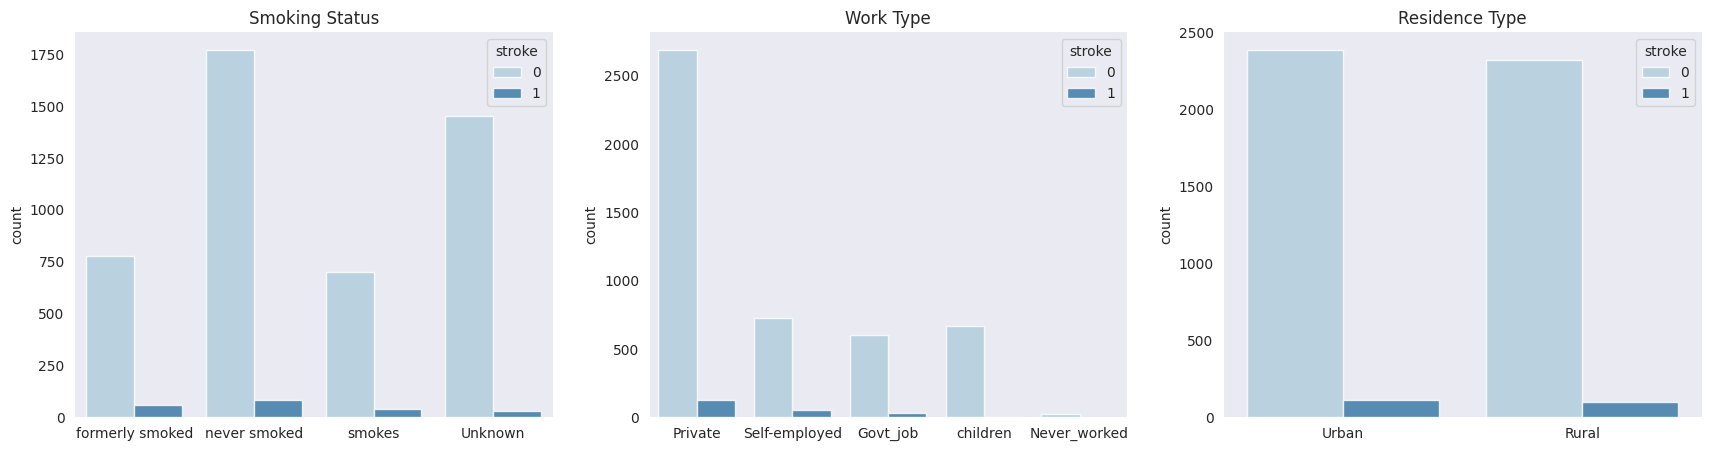

In [ ]:
#1 Choice of residence, work, type, and glucose level can have effect possibility of one getting stroke

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x='smoking_status', alpha=0.8, palette="Paired",hue='stroke', data = dataset );
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Smoking Status');

plt.subplot(1,3,2)
sns.countplot(x='work_type', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Work Type');

plt.subplot(1,3,3)
sns.countplot(x='Residence_type', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Residence Type');



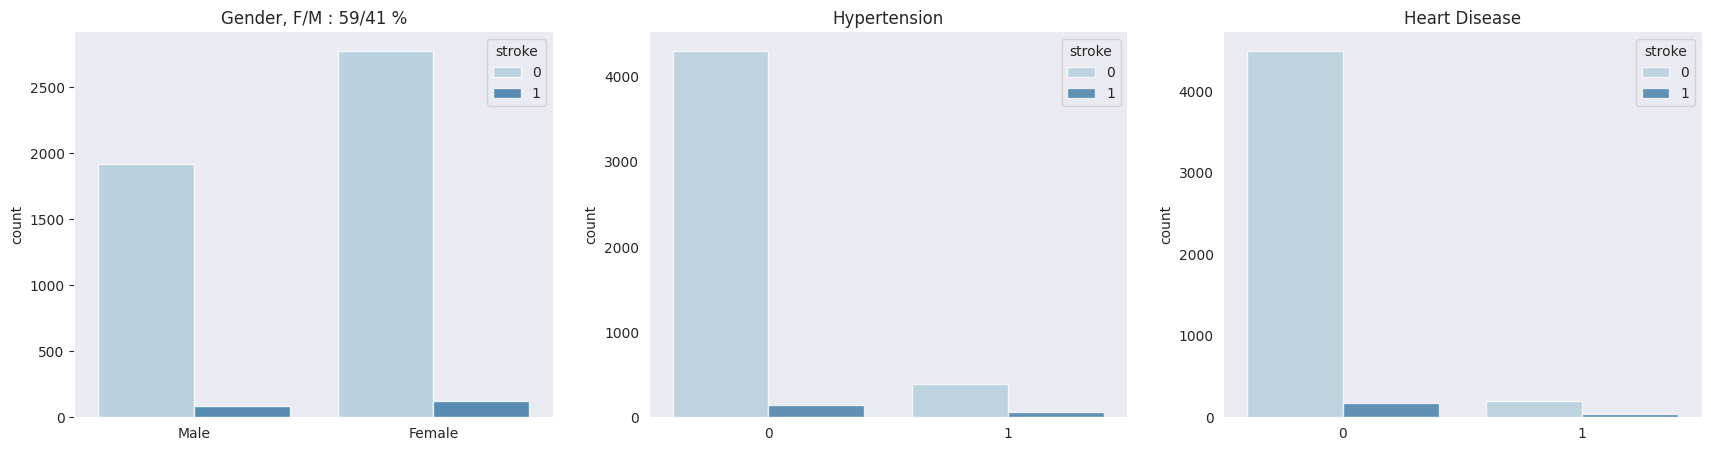

In [ ]:
# 2 Gender, hypertension and any history of heart diseases effect the stroke probability¶
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x='gender', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender, F/M : 59/41 %');

plt.subplot(1,3,2)
sns.countplot(x='hypertension', alpha=0.75, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hypertension');

plt.subplot(1,3,3)
sns.countplot(x='heart_disease', alpha=0.75, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Heart Disease');

**check the ratio of the two to see the imbalances**

In [ ]:

print("Patient that dont stroke ratio: " + str(dataset.stroke.value_counts()[1]/len(dataset)))
print("Patient that have stroke ratio : " + str(dataset.stroke.value_counts()[0]/len(dataset)))
dataset.stroke.value_counts()
dataset.stroke.value_counts()

Patient that dont stroke ratio: 0.04258353708231459
Patient that have stroke ratio : 0.9574164629176855


,count
stroke,
0,4699
1,209


Visualise age distribution


<Figure size 2100x500 with 0 Axes>

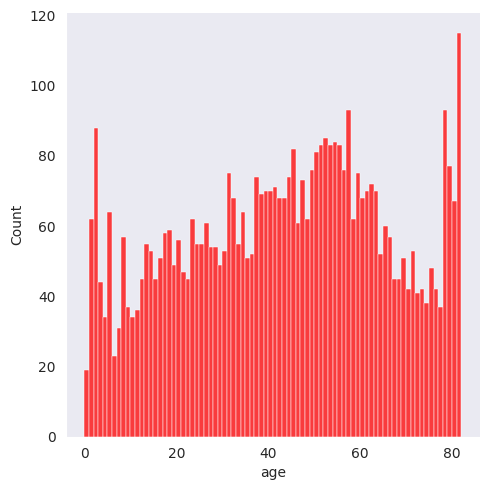

In [ ]:
plt.figure(figsize=(21,5))
sns.displot(dataset['age'], bins=max(dataset['age']),color='red', kde=False);

**Visualise age and stroke **
this is need to check the ccorrelation betwen the row varibale


<Figure size 1000x500 with 0 Axes>

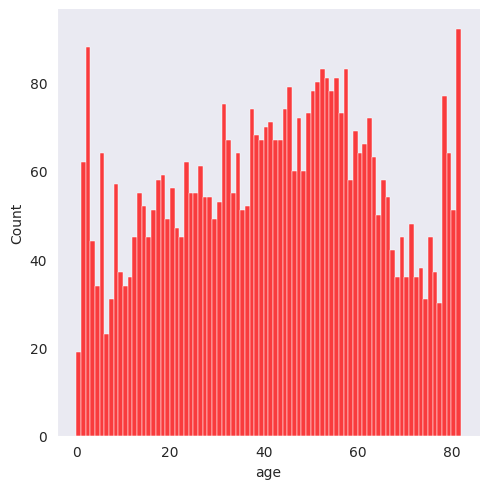

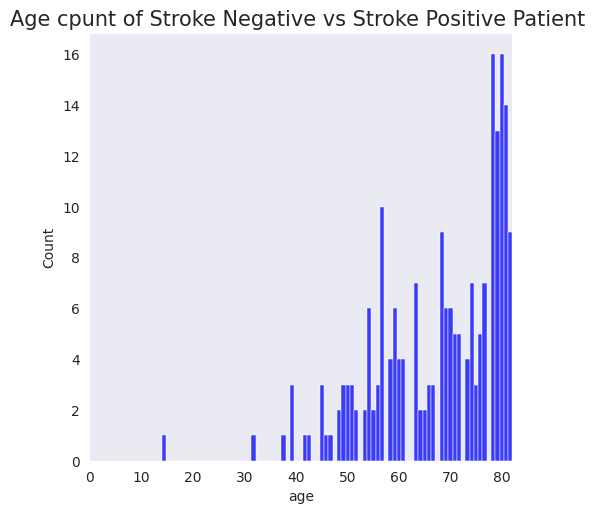

In [ ]:
plt.figure(figsize=(10, 5))

sns.displot(dataset[dataset['stroke'] == 0]["age"], bins=max(dataset['age']), color='red',kde=False)
sns.displot(dataset[dataset['stroke'] == 1]["age"], bins=max(dataset['age']), color='blue', kde=False)

plt.title('Age cpunt of Stroke Negative vs Stroke Positive Patient ', fontsize=15)
plt.xlim([min(dataset['age']),max(dataset['age'])])
plt.show()

# Data Preprocessing

Slicing the dataset into dependent and independent variable

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   int64  
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 460.1+ KB


In [ ]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data with label encoder


label encoding is used for datapoint with only two values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,4] = le.fit_transform(X[:,4])
X[:,6] = le.fit_transform(X[:,6])


### One Hot Encoding the "Work_type and  "somke_status" column" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',
OneHotEncoder(), [5,9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Note** Onehotencoder is used one  datapoint with only two or more values which have numeric order

In [ ]:
# removed redundant X print statement

In [ ]:
X.shape

(4908, 17)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X, y = sm.fit_resample(X, y)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset again to start from a clean state for this transformation
dataset_clean = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Perform the necessary cleaning steps
dataset_clean = dataset_clean.dropna()
dataset_clean = dataset_clean.drop('id', axis=1)
dataset_clean.drop(dataset_clean.loc[dataset_clean['gender']=='Other'].index, inplace=True)
dataset_clean.age = dataset_clean.age.round().astype('int')


# Separate features (X) and target (y)
X = dataset_clean.iloc[:, :-1]
y = dataset_clean.iloc[:, -1].values


# Define columns for Label Encoding and OneHot Encoding
label_cols = ['gender', 'ever_married', 'Residence_type']
ohe_cols = ['work_type', 'smoking_status']

# Identify the indices of these columns
label_indices = [X.columns.get_loc(col) for col in label_cols]
ohe_indices = [X.columns.get_loc(col) for col in ohe_cols]


# Create a ColumnTransformer
# For Label Encoding, we can use 'ordinal' encoder or manually apply LabelEncoder before CT
# Let's manually apply LabelEncoder for clarity based on previous steps
X_copy = X.copy()
le = LabelEncoder()
for col in label_cols:
    X_copy[col] = le.fit_transform(X_copy[col])


ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ohe_indices)],
    remainder='passthrough'
)

# Apply the ColumnTransformer
X_transformed = ct.fit_transform(X_copy)


# Get all feature names after transformation
feature_names = ct.get_feature_names_out()

# Convert to DataFrame for easier handling
X_df = pd.DataFrame(X_transformed, columns=feature_names)

# Check
print(X_df.columns)
print(X_df.head())

Index(['encoder__work_type_Govt_job', 'encoder__work_type_Never_worked',
       'encoder__work_type_Private', 'encoder__work_type_Self-employed',
       'encoder__work_type_children', 'encoder__smoking_status_Unknown',
       'encoder__smoking_status_formerly smoked',
       'encoder__smoking_status_never smoked',
       'encoder__smoking_status_smokes', 'remainder__gender', 'remainder__age',
       'remainder__hypertension', 'remainder__heart_disease',
       'remainder__ever_married', 'remainder__Residence_type',
       'remainder__avg_glucose_level', 'remainder__bmi'],
      dtype='object')
   encoder__work_type_Govt_job  encoder__work_type_Never_worked  \
0                          0.0                              0.0   
1                          0.0                              0.0   
2                          0.0                              0.0   
3                          0.0                              0.0   
4                          0.0                              0.0 

In [ ]:
X_df.columns

Index(['encoder__work_type_Govt_job', 'encoder__work_type_Never_worked',
       'encoder__work_type_Private', 'encoder__work_type_Self-employed',
       'encoder__work_type_children', 'encoder__smoking_status_Unknown',
       'encoder__smoking_status_formerly smoked',
       'encoder__smoking_status_never smoked',
       'encoder__smoking_status_smokes', 'remainder__gender', 'remainder__age',
       'remainder__hypertension', 'remainder__heart_disease',
       'remainder__ever_married', 'remainder__Residence_type',
       'remainder__avg_glucose_level', 'remainder__bmi'],
      dtype='object')

### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)

X = fit.transform(X)

[1.674e-01 2.200e+01 7.548e+00 1.128e+02 6.443e+02 3.190e+02 1.432e+02
 3.290e+00 1.605e+01 2.433e+00 2.977e+04 4.802e+02 4.636e+02 1.911e+02
 2.827e+00 7.895e+03 2.100e+02]


In [ ]:
#patient to be used for preditction
patient = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]

## Splitting dateset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size=0.2, random_state = 1)



**Handling imbalances data**

Verifying of  oversampling

In [ ]:
X_test

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 9.455e-01, 9.026e+01,
        2.715e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 1.694e+02,
        2.840e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 9.913e+01,
        2.280e+01],
       ...,
       [2.355e-01, 0.000e+00, 7.645e-01, ..., 1.000e+00, 1.109e+02,
        3.118e+01],
       [0.000e+00, 0.000e+00, 9.397e-01, ..., 9.397e-01, 1.044e+02,
        2.049e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.087e-01, 8.991e+01,
        3.224e+01]])

In [ ]:
X_train

array([[  0.   ,   0.   ,   0.887, ...,   0.   ,  87.116,  29.883],
       [  0.   ,   0.   ,   0.   , ...,   0.523,  90.032,  33.58 ],
       [  0.   ,   0.   ,   1.   , ...,   0.458, 169.358,  37.906],
       ...,
       [  0.   ,   0.   ,   1.   , ...,   0.   ,  77.42 ,  26.1  ],
       [  0.   ,   0.   ,   0.171, ...,   0.   ,  79.078,  29.368],
       [  1.   ,   0.   ,   0.   , ...,   0.   ,  94.61 ,  28.4  ]])

In [ ]:
print(y_test)

[1 0 0 ... 1 1 1]


In [ ]:
print(y_train)

[1 1 1 ... 0 1 0]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_test)

[[-0.424 -0.05  -1.306 ...  0.932 -0.504 -0.352]
 [-0.424 -0.05   0.898 ...  1.051  1.565 -0.163]
 [-0.424 -0.05  -1.306 ...  1.051 -0.272 -1.009]
 ...
 [ 0.344 -0.05   0.379 ...  1.051  0.036  0.256]
 [-0.424 -0.05   0.765 ...  0.919 -0.133 -1.357]
 [-0.424 -0.05  -1.306 ... -0.889 -0.513  0.417]]


# Helper Functions

**Prediction Function**

In [ ]:
#this function will be use to make predictions after models is train
def prediction(classifier, X=X_test):
  y_pred = classifier.predict(X)

  print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
  print()

     #this condition check if model accuracy is below 90% if so it apply tunning using gridsearch
  if accuracy_score(y_test, y_pred) < 0.90:
    print("MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED ")
    grid_search_tunning(classifier,parameters)

  print()
  # Predicting the Test set results
  print("Predicting the Test set results ")
  #matching all predtiction with true values this help eliminate overfiting
  print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
  print()
  print(f" Predicting for: ")
  #get the patient that will be used to make prediction from dataset
  print(dataset[:1])
  print(f" y_predicted :{classifier.predict(sc.transform([patient]))}")
  print("==================================================================")
  print()





**Function for training models**

In [ ]:
def trainmodels(classifier, X_train, y_train):

  #this function takes the untrain models, train it then return the train model

  classifier.fit(X_train, y_train)
  #calling the prediction function to make predictions on the train models
  prediction(classifier)
  #making confusion matrix
  makin_confusion_matrix(classifier)


  #this function return nthe train model.
  return classifier


**Making the Confusion Matrix Function**

In [ ]:
def makin_confusion_matrix(classifier,X=X_test):
  #this function takes train model and make matrix on it
  y_pred = classifier.predict(X)
  cm = confusion_matrix(y_test, y_pred )
  classifier_report=classification_report(y_test, y_pred )
  print()
  print("Making the Confusion Matrix")
  print("**************************")
  print("Accuracy: {:.2f} %".format(accuracy_score(y_test,y_pred)*100))
  print(cm)
  print("")
  print("")
  print("Accuracy repeort")
  print(classifier_report)





**Plot Confusion matrix function **

In [ ]:
def plot_confusion_matrix(classifier, X=X_test):
  y_pred = classifier.predict(X)
  cm_map = sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap='OrRd', fmt='g')
  plt.show(cm_map)

**Function for app K-Fold cross validation**

In [ ]:
def k_fold_cross_validation(classifier, X_train, y_train, cv:int):
  print("****************************************************")
  accuracies = cross_val_score(estimator =  classifier, X = X_train, y = y_train, cv = 15)
  print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



**Function for Grid search fine tuning**

**Note:** tunning is only apply to models with accuracy below 90%

In [ ]:
def grid_search_tunning (classifier,parameters):
  grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, verbose=1, cv=10, n_jobs=-1)
  grid_search.fit(X_train, y_train)
  best_accuracy = grid_search.best_score_
  best_parameters = grid_search.best_params_
  print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
  print("Best Parameters:", best_parameters)

**Function for Randomsearchcv**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def random_search_tuning(classifier, parameters, n_iter=20):
    random_search = RandomizedSearchCV(
        estimator=classifier,
        param_distributions=parameters,
        n_iter=n_iter,         # number of random combinations
        scoring='roc_auc',     # or 'accuracy', 'recall' — depending on your goal
        verbose=1,
        cv=10,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    best_accuracy = random_search.best_score_
    best_parameters = random_search.best_params_
    print("Best ROC-AUC: {:.2f} %".format(best_accuracy * 100))
    print("Best Parameters:", best_parameters)
    return random_search


# Classifications Modeling

## Logistic Regression

In [ ]:
parameters = {
    'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25],'class_weight':['balanced']}
LR = trainmodels(LogisticRegression(class_weight='balanced'),X_train, y_train)

Accuracy: 78.14 %

MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED 
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Accuracy: 77.72 %
Best Parameters: {'C': 0.009, 'class_weight': 'balanced', 'penalty': 'l2'}

Predicting the Test set results 
[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban           169.3575  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 78.14 %
[[692 238]
 [173 777]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       930
           1       0.77      0.82      0.79       950

    accuracy                           0.78      1880
   macro avg       0.78      0.78    

**Tunning using GridSearch**

**Note: gridsearch is only applied on low preforming models**

## Random Forest

**Training the Random Forest Classification model on the Training set**

In [ ]:
RF= trainmodels(RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),X_train, y_train)

Accuracy: 97.13 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban           169.3575  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 97.13 %
[[914  16]
 [ 38 912]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       930
           1       0.98      0.96      0.97       950

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
rf_params = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [None, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}

# RandomizedSearchCV
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=40,             # number of random combinations
    scoring='roc_auc',     # focus on sensitivity/recall for stroke
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
rf_search.fit(X_train, y_train)

# Best model
best_rf = rf_search.best_estimator_

print("Best Parameters:", rf_search.best_params_)
print("Best ROC-AUC Score:", rf_search.best_score_)

# Evaluate on test set
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 25, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}
Best ROC-AUC Score: 0.9954084227727588
Confusion Matrix:
 [[925   5]
 [ 39 911]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       930
           1       0.99      0.96      0.98       950

    accuracy                           0.98      1880
   macro avg       0.98      0.98      0.98      1880
weighted avg       0.98      0.98      0.98      1880

Test ROC-AUC: 0.9960124504810414


## Decision Tree Classification

**Training the Random Forest Classification model on the Training set**

In [ ]:
parameters = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
DTC= trainmodels(DecisionTreeClassifier(criterion = 'entropy'),X_train,y_train)

Accuracy: 96.22 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban           169.3575  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 96.22 %
[[889  41]
 [ 30 920]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       930
           1       0.96      0.97      0.96       950

    accuracy                           0.96      1880
   macro avg       0.96      0.96      0.96      1880
weighted avg       0.96      0.96      0.96      1880



## Naive Bayes

**Training the Naive Bayes model on the Training set**

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)
}
NB =trainmodels(GaussianNB(),X_train,y_train)

Accuracy: 60.74 %

MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED 
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Accuracy: 70.96 %
Best Parameters: {'var_smoothing': np.float64(0.12328467394420659)}

Predicting the Test set results 
[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban           169.3575  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 60.74 %
[[196 734]
 [  4 946]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.98      0.21      0.35       930
           1       0.56      1.00      0.72       950

    accuracy                           0.61      1880
   macro avg       0.77      0.60      0.5

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define the model
NB = GaussianNB()

# Hyperparameter grid for var_smoothing
params = {'var_smoothing': np.logspace(0, -9, num=100)}

# RandomizedSearchCV
nb_search = RandomizedSearchCV(
    estimator=NB,
    param_distributions=params,
    n_iter=40,            # 40 random candidates
    scoring='roc_auc',    # focus on sensitivity for stroke
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
nb_search.fit(X_train, y_train)

# Best model
best_nb = nb_search.best_estimator_

print("Best var_smoothing:", nb_search.best_params_)
print("Best ROC-AUC Score:", nb_search.best_score_)

# Evaluate on test set
y_pred = best_nb.predict(X_test)
y_proba = best_nb.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best var_smoothing: {'var_smoothing': np.float64(0.1)}
Best ROC-AUC Score: 0.8335848772351845
Confusion Matrix:
 [[397 533]
 [ 36 914]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.58       930
           1       0.63      0.96      0.76       950

    accuracy                           0.70      1880
   macro avg       0.77      0.69      0.67      1880
weighted avg       0.77      0.70      0.67      1880

Test ROC-AUC: 0.8408319185059423


**Tunning using GridSearch and RandomsearchCv**

## K-Nearest Neighbors (K-NN)

**Training the K-NN model on the Training set**

In [ ]:
KNN = trainmodels(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),X_train,y_train)

Accuracy: 93.62 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban           169.3575  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 93.62 %
[[814 116]
 [  4 946]]


Accuracy repeort
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       930
           1       0.89      1.00      0.94       950

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define the model
knn = KNeighborsClassifier()

# Hyperparameter grid
param_grid = {
    'n_neighbors': list(range(3, 21)),        # try neighbors from 3 to 20
    'weights': ['uniform', 'distance'],       # uniform or weighted
    'p': [1, 2]                               # Manhattan or Euclidean
}

# GridSearchCV
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='roc_auc',   # focus on stroke detection
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_knn.fit(X_train, y_train)

# Best model
best_knn = grid_knn.best_estimator_

print("Best Parameters:", grid_knn.best_params_)
print("Best ROC-AUC Score:", grid_knn.best_score_)

# Evaluate on test set
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best ROC-AUC Score: 0.9934743097317584
Confusion Matrix:
 [[878  52]
 [  6 944]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       930
           1       0.95      0.99      0.97       950

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880

Test ROC-AUC: 0.9950537634408602


## Kernel SVM

**Training the Kernel SVM model on the Training set**

In [ ]:
KSVM=trainmodels(SVC(kernel = 'rbf', random_state = 0), X_train,y_train)

Accuracy: 93.46 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban           169.3575  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 93.46 %
[[891  39]
 [ 84 866]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       930
           1       0.96      0.91      0.93       950

    accuracy                           0.93      1880
   macro avg       0.94      0.93      0.93      1880
weighted avg       0.94      0.93      0.93      1880



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Define the model
svc = SVC(kernel='rbf', probability=True, random_state=42)

# Hyperparameter distributions
param_dist = {
    'C': np.logspace(-2, 3, 10),       # from 0.01 to 1000
    'gamma': np.logspace(-4, 1, 10),   # from 0.0001 to 10
    'class_weight': ['balanced', None]
}

# RandomizedSearchCV
rand_search_svc = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=30,             # try 30 random combinations
    scoring='roc_auc',     # focus on stroke detection
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on training data
rand_search_svc.fit(X_train, y_train)

# Best model
best_svc = rand_search_svc.best_estimator_

print("Best Parameters:", rand_search_svc.best_params_)
print("Best ROC-AUC Score:", rand_search_svc.best_score_)

# Evaluate on test set
y_pred = best_svc.predict(X_test)
y_proba = best_svc.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'gamma': np.float64(0.059948425031894084), 'class_weight': 'balanced', 'C': np.float64(21.544346900318843)}
Best ROC-AUC Score: 0.991259285087499
Confusion Matrix:
 [[896  34]
 [ 52 898]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       930
           1       0.96      0.95      0.95       950

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880

Test ROC-AUC: 0.9928058856819467


# Gradient boosting Classifications modeling

## Xgboost

### Training xgboost

In [ ]:
XGB = trainmodels(XGBClassifier(),X_train,y_train)

Accuracy: 97.02 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban           169.3575  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 97.02 %
[[911  19]
 [ 37 913]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       930
           1       0.98      0.96      0.97       950

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Define the model
xgb = XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False, random_state=42)

# Hyperparameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

# RandomizedSearchCV
rand_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,           # try 40 random combinations
    scoring='roc_auc',   # maximize ROC-AUC for stroke recall
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on training data
rand_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = rand_search_xgb.best_estimator_

print("Best Parameters:", rand_search_xgb.best_params_)
print("Best ROC-AUC Score:", rand_search_xgb.best_score_)

# Evaluate on test set
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'subsample': 0.9, 'reg_lambda': 3, 'reg_alpha': 0.01, 'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.9}
Best ROC-AUC Score: 0.9947721344242091
Confusion Matrix:
 [[920  10]
 [ 37 913]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       930
           1       0.99      0.96      0.97       950

    accuracy                           0.97      1880
   macro avg       0.98      0.98      0.97      1880
weighted avg       0.98      0.97      0.97      1880

Test ROC-AUC: 0.9955076400679117


## CatBoost

###Training Catboots

In [ ]:
CAT =trainmodels(CatBoostClassifier(),X_train, y_train)

Learning rate set to 0.02438
0:	learn: 0.6528005	total: 52.5ms	remaining: 52.4s
1:	learn: 0.6240838	total: 57.3ms	remaining: 28.6s
2:	learn: 0.5936603	total: 62ms	remaining: 20.6s
3:	learn: 0.5695643	total: 66.7ms	remaining: 16.6s
4:	learn: 0.5513969	total: 71.4ms	remaining: 14.2s
5:	learn: 0.5279523	total: 76.3ms	remaining: 12.6s
6:	learn: 0.5101327	total: 81ms	remaining: 11.5s
7:	learn: 0.4943699	total: 85.6ms	remaining: 10.6s
8:	learn: 0.4735702	total: 90.3ms	remaining: 9.95s
9:	learn: 0.4597607	total: 95.1ms	remaining: 9.42s
10:	learn: 0.4445645	total: 100ms	remaining: 8.99s
11:	learn: 0.4246986	total: 105ms	remaining: 8.64s
12:	learn: 0.4154483	total: 110ms	remaining: 8.33s
13:	learn: 0.4019100	total: 115ms	remaining: 8.07s
14:	learn: 0.3872102	total: 119ms	remaining: 7.84s
15:	learn: 0.3764900	total: 124ms	remaining: 7.64s
16:	learn: 0.3649806	total: 129ms	remaining: 7.46s
17:	learn: 0.3544539	total: 134ms	remaining: 7.3s
18:	learn: 0.3419869	total: 139ms	remaining: 7.16s
19:	lea

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Get the first 5 rows of the original dataset for prediction
# We need to re-apply the preprocessing steps to these rows

# IMPORTANT: Replicate the initial cleaning steps applied to the full dataset
original_first_5_rows = dataset.head(5).copy()

# Drop 'id' and 'stroke' (target variable)
if 'id' in original_first_5_rows.columns:
    original_first_5_rows = original_first_5_rows.drop('id', axis=1)
if 'stroke' in original_first_5_rows.columns:
    original_first_5_rows = original_first_5_rows.drop('stroke', axis=1)


# Handle 'Other' gender if necessary (should be done before Label Encoding)
if 'gender' in original_first_5_rows.columns and 'Other' in original_first_5_rows['gender'].unique():
     original_first_5_rows.drop(original_first_5_rows.loc[original_first_5_rows['gender']=='Other'].index, inplace=True)


# Ensure age is integer as in preprocessing
if 'age' in original_first_5_rows.columns:
    original_first_5_rows['age'] = original_first_5_rows['age'].round().astype('int')

# Apply the same manual Label Encoding as done in training
# It's crucial to fit the LabelEncoder on the data it was originally fit on (X before OHE)
# Assuming you have access to the 'dataset_clean' DataFrame or the 'X' DataFrame
# from your training steps, which contains the data after initial cleaning
# and before the ColumnTransformer was applied.
# For robustness, let's refit LabelEncoders using the full cleaned dataset's unique values
dataset_clean_temp = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
dataset_clean_temp = dataset_clean_temp.dropna()
dataset_clean_temp = dataset_clean_temp.drop('id', axis=1)
dataset_clean_temp.drop(dataset_clean_temp.loc[dataset_clean_temp['gender']=='Other'].index, inplace=True)
dataset_clean_temp.age = dataset_clean_temp.age.round().astype('int')


le_gender = LabelEncoder()
le_gender.fit(dataset_clean_temp['gender'])
if 'gender' in original_first_5_rows.columns:
    original_first_5_rows['gender'] = le_gender.transform(original_first_5_rows['gender'])

le_married = LabelEncoder()
le_married.fit(dataset_clean_temp['ever_married'])
if 'ever_married' in original_first_5_rows.columns:
    original_first_5_rows['ever_married'] = le_married.transform(original_first_5_rows['ever_married'])

le_residence = LabelEncoder()
le_residence.fit(dataset_clean_temp['Residence_type'])
if 'Residence_type' in original_first_5_rows.columns:
    original_first_5_rows['Residence_type'] = le_residence.transform(original_first_5_rows['Residence_type'])

# Ensure column order matches the data used to fit the ColumnTransformer
# The columns before ct was fitted were:
# 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'
expected_cols_before_ct = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

# Reindex the DataFrame to match the expected order
original_first_5_rows = original_first_5_rows[expected_cols_before_ct]


# Apply the ColumnTransformer
# The ColumnTransformer was fit on data where 'gender', 'ever_married', 'Residence_type' were already label encoded.
# It applies OneHotEncoder to 'work_type' and 'smoking_status' and passthrough to the rest.
first_5_transformed = ct.transform(original_first_5_rows)

# Apply StandardScaler
first_5_scaled = sc.transform(first_5_transformed)

# Make predictions using the trained CAT model
predictions_first_5 = CAT.predict(first_5_scaled)

# Get prediction probabilities
probabilities_first_5 = CAT.predict_proba(first_5_scaled)[:, 1]

print("Predictions for the first 5 rows:")
print(predictions_first_5)
print("\nPrediction Probabilities for the first 5 rows:")
print(probabilities_first_5)

Predictions for the first 5 rows:
[1 1 0 1 1]

Prediction Probabilities for the first 5 rows:
[0.674 0.608 0.202 0.552 0.735]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Get the first 5 rows of the original dataset for prediction
# We need to re-apply the preprocessing steps to these rows

# IMPORTANT: Replicate the initial cleaning steps applied to the full dataset
original_first_5_rows = dataset.head(5).copy()

# Drop 'id' and 'stroke' (target variable)
if 'id' in original_first_5_rows.columns:
    original_first_5_rows = original_first_5_rows.drop('id', axis=1)
if 'stroke' in original_first_5_rows.columns:
    original_first_5_rows = original_first_5_rows.drop('stroke', axis=1)


# Handle 'Other' gender if necessary (should be done before Label Encoding)
if 'gender' in original_first_5_rows.columns and 'Other' in original_first_5_rows['gender'].unique():
     original_first_5_rows.drop(original_first_5_rows.loc[original_first_5_rows['gender']=='Other'].index, inplace=True)


# Ensure age is integer as in preprocessing
if 'age' in original_first_5_rows.columns:
    original_first_5_rows['age'] = original_first_5_rows['age'].round().astype('int')

# Apply the same manual Label Encoding as done in training
# It's crucial to fit the LabelEncoder on the data it was originally fit on (X before OHE)
# Assuming you have access to the 'dataset_clean' DataFrame or the 'X' DataFrame
# from your training steps, which contains the data after initial cleaning
# and before the ColumnTransformer was applied.
# For robustness, let's refit LabelEncoders using the full cleaned dataset's unique values
dataset_clean_temp = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
dataset_clean_temp = dataset_clean_temp.dropna()
dataset_clean_temp = dataset_clean_temp.drop('id', axis=1)
dataset_clean_temp.drop(dataset_clean_temp.loc[dataset_clean_temp['gender']=='Other'].index, inplace=True)
dataset_clean_temp.age = dataset_clean_temp.age.round().astype('int')


le_gender = LabelEncoder()
le_gender.fit(dataset_clean_temp['gender'])
if 'gender' in original_first_5_rows.columns:
    original_first_5_rows['gender'] = le_gender.transform(original_first_5_rows['gender'])

le_married = LabelEncoder()
le_married.fit(dataset_clean_temp['ever_married'])
if 'ever_married' in original_first_5_rows.columns:
    original_first_5_rows['ever_married'] = le_married.transform(original_first_5_rows['ever_married'])

le_residence = LabelEncoder()
le_residence.fit(dataset_clean_temp['Residence_type'])
if 'Residence_type' in original_first_5_rows.columns:
    original_first_5_rows['Residence_type'] = le_residence.transform(original_first_5_rows['Residence_type'])

# Ensure column order matches the data used to fit the ColumnTransformer
# The columns before ct was fitted were:
# 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'
expected_cols_before_ct = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

# Reindex the DataFrame to match the expected order
original_first_5_rows = original_first_5_rows[expected_cols_before_ct]


# Apply the ColumnTransformer
# The ColumnTransformer was fit on data where 'gender', 'ever_married', 'Residence_type' were already label encoded.
# It applies OneHotEncoder to 'work_type' and 'smoking_status' and passthrough to the rest.
first_5_transformed = ct.transform(original_first_5_rows)

# Apply StandardScaler
first_5_scaled = sc.transform(first_5_transformed)

# Make predictions using the trained CAT model
predictions_first_5 = CAT.predict(first_5_scaled)

# Get prediction probabilities
probabilities_first_5 = CAT.predict_proba(first_5_scaled)[:, 1]

print("Predictions for the first 5 rows:")
print(predictions_first_5)
print("\nPrediction Probabilities for the first 5 rows:")
print(probabilities_first_5)

In [ ]:
import joblib
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load saved objects
ct = joblib.load('column_transformer.pkl')
sc = joblib.load('standard_scaler.pkl')
CAT = CatBoostClassifier()
CAT.load_model('catboost_stroke_model.cbm')

# ---------------- Single User Input ----------------
# Example: You can replace these values with input() for dynamic user input
user_input = {
    'gender': ['Male'],
    'age': [67],
    'hypertension': [1],
    'heart_disease': [0],
    'ever_married': ['Yes'],
    'work_type': ['Private'],
    'Residence_type': ['Urban'],
    'avg_glucose_level': [180.2],
    'bmi': [32.5],
    'smoking_status': ['formerly smoked']
}

user_df = pd.DataFrame(user_input)

# ---------------- Preprocessing ----------------
# Label Encoding for categorical columns
label_cols = ['gender', 'ever_married', 'Residence_type']
for col in label_cols:
    le = LabelEncoder()
    # Fit encoder on known classes (must match training data)
    if col == 'gender':
        le.classes_ = np.array(['Female', 'Male'])
    elif col == 'ever_married':
        le.classes_ = np.array(['No', 'Yes'])
    elif col == 'Residence_type':
        le.classes_ = np.array(['Rural', 'Urban'])
    user_df[col] = le.transform(user_df[col])

# Apply ColumnTransformer and StandardScaler
user_transformed = ct.transform(user_df)
user_scaled = sc.transform(user_transformed)

# Make prediction
prediction = CAT.predict(user_scaled)[0]
probability = CAT.predict_proba(user_scaled)[0][1]

# Print results
print("Prediction (0 = No Stroke, 1 = Stroke):", prediction)
print("Probability of Stroke:", probability)


Prediction (0 = No Stroke, 1 = Stroke): 0
Probability of Stroke: 0.1668731747633319


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Get the last 5 rows of the original dataset for prediction
# We need to re-apply the preprocessing steps to these rows

# IMPORTANT: Replicate the initial cleaning steps applied to the full dataset
original_last_5_rows = dataset.tail(5).copy()

# Drop 'id' and 'stroke' (target variable)
if 'id' in original_last_5_rows.columns:
    original_last_5_rows = original_last_5_rows.drop('id', axis=1)
if 'stroke' in original_last_5_rows.columns:
    original_last_5_rows = original_last_5_rows.drop('stroke', axis=1)


# Handle 'Other' gender if necessary (should be done before Label Encoding)
if 'gender' in original_last_5_rows.columns and 'Other' in original_last_5_rows['gender'].unique():
     original_last_5_rows.drop(original_last_5_rows.loc[original_last_5_rows['gender']=='Other'].index, inplace=True)


# Ensure age is integer as in preprocessing
if 'age' in original_last_5_rows.columns:
    original_last_5_rows['age'] = original_last_5_rows['age'].round().astype('int')

# Apply the same manual Label Encoding as done in training
# It's crucial to fit the LabelEncoder on the data it was originally fit on (X before OHE)
# Assuming you have access to the 'dataset_clean' DataFrame or the 'X' DataFrame
# from your training steps, which contains the data after initial cleaning
# and before the ColumnTransformer was applied.
# For robustness, let's refit LabelEncoders using the full cleaned dataset's unique values
dataset_clean_temp = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
dataset_clean_temp = dataset_clean_temp.dropna()
dataset_clean_temp = dataset_clean_temp.drop('id', axis=1)
dataset_clean_temp.drop(dataset_clean_temp.loc[dataset_clean_temp['gender']=='Other'].index, inplace=True)
dataset_clean_temp.age = dataset_clean_temp.age.round().astype('int')


le_gender = LabelEncoder()
le_gender.fit(dataset_clean_temp['gender'])
if 'gender' in original_last_5_rows.columns:
    original_last_5_rows['gender'] = le_gender.transform(original_last_5_rows['gender'])

le_married = LabelEncoder()
le_married.fit(dataset_clean_temp['ever_married'])
if 'ever_married' in original_last_5_rows.columns:
    original_last_5_rows['ever_married'] = le_married.transform(original_last_5_rows['ever_married'])

le_residence = LabelEncoder()
le_residence.fit(dataset_clean_temp['Residence_type'])
if 'Residence_type' in original_last_5_rows.columns:
    original_last_5_rows['Residence_type'] = le_residence.transform(original_last_5_rows['Residence_type'])

# Ensure column order matches the data used to fit the ColumnTransformer
# The columns before ct was fitted were:
# 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'
expected_cols_before_ct = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

# Reindex the DataFrame to match the expected order
original_last_5_rows = original_last_5_rows[expected_cols_before_ct]


# Apply the ColumnTransformer
# The ColumnTransformer was fit on data where 'gender', 'ever_married', 'Residence_type' were already label encoded.
# It applies OneHotEncoder to 'work_type' and 'smoking_status' and passthrough to the rest.
last_5_transformed = ct.transform(original_last_5_rows)

# Apply StandardScaler
last_5_scaled = sc.transform(last_5_transformed)

# Make predictions using the trained CAT model
predictions_last_5 = CAT.predict(last_5_scaled)

# Get prediction probabilities
probabilities_last_5 = CAT.predict_proba(last_5_scaled)[:, 1]

print("Predictions for the last 5 rows:")
print(predictions_last_5)
print("\nPrediction Probabilities for the last 5 rows:")
print(probabilities_last_5)

Predictions for the last 5 rows:
[0 0 0 0 0]

Prediction Probabilities for the last 5 rows:
[0.    0.073 0.006 0.004 0.013]


In [ ]:
import joblib
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load saved objects
ct = joblib.load('column_transformer.pkl')
sc = joblib.load('standard_scaler.pkl')
CAT = CatBoostClassifier()
CAT.load_model('catboost_stroke_model.cbm')

# ---------------- Sample 5 User Inputs ----------------
data = {
    'gender': ['Male', 'Female', 'Male', 'Male', 'Female'],
    'age': [42, 82, 80, 74, 49],
    'hypertension': [0, 1, 0, 0, 0],
    'heart_disease': [0, 0, 1, 0, 0],
    'ever_married': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'work_type': ['Private', 'Self-employed', 'Self-employed', 'Private', 'Private'],
    'Residence_type': ['Rural', 'Urban', 'Urban', 'Rural', 'Urban'],
    'avg_glucose_level': [83.41, 196.92, 252.72, 219.72, 60.91],
    'bmi': [25.4, 22.2, 30.5, 33.7, 29.9],
    'smoking_status': ['Unknown', 'never smoked', 'formerly smoked', 'formerly smoked', 'never smoked']
}

df = pd.DataFrame(data)

# ---------------- Preprocessing ----------------
label_cols = ['gender', 'ever_married', 'Residence_type']

for col in label_cols:
    le = LabelEncoder()
    if col == 'gender':
        le.classes_ = np.array(['Female','Male'])
    elif col == 'ever_married':
        le.classes_ = np.array(['No','Yes'])
    elif col == 'Residence_type':
        le.classes_ = np.array(['Rural','Urban'])
    df[col] = le.transform(df[col])

# Apply ColumnTransformer and StandardScaler
transformed = ct.transform(df)
scaled = sc.transform(transformed)

# Make predictions
predictions = CAT.predict(scaled)
probabilities = CAT.predict_proba(scaled)[:, 1]

# Determine risk level based on probability
risk_levels = []
for prob in probabilities:
    if prob >= 0.85:
        risk_levels.append("Very High Risk")
    elif prob >= 0.6:
        risk_levels.append("High Risk")
    elif prob >= 0.4:
        risk_levels.append("Moderate Risk")
    else:
        risk_levels.append("Low Risk")

# Print results
for i in range(len(df)):
    print(f"User {i+1}: Prediction = {predictions[i]}, Probability = {probabilities[i]:.2f}, Risk Level = {risk_levels[i]}")


User 1: Prediction = 0, Probability = 0.00, Risk Level = Low Risk
User 2: Prediction = 1, Probability = 0.72, Risk Level = High Risk
User 3: Prediction = 0, Probability = 0.47, Risk Level = Moderate Risk
User 4: Prediction = 0, Probability = 0.45, Risk Level = Moderate Risk
User 5: Prediction = 1, Probability = 0.59, Risk Level = Moderate Risk


**Predicting the Test set results**

---




# Deep Learning Classifications Modeling

In [ ]:
import tensorflow as tf

## Artificial Neural Network

### Initialising the ANN

In [ ]:
ann = tf.keras.models.Sequential()

###Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

###Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

###Comapeling ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###Training the ANN

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6470 - loss: 0.6097
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7848 - loss: 0.4646
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.4207
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8175 - loss: 0.3847
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8314 - loss: 0.3749
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8346 - loss: 0.3674
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.3457
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8534 - loss: 0.3370
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8621 - loss: 0.3220
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8691 - loss: 0.3084
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.3031
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

**Predict stroke risk factor for a patient**

In [ ]:

print(ann.predict(sc.transform([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]]))> 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
[[ True]]


In [ ]:
print(" possibility")

print(ann.predict(sc.transform([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]])))

 possibility
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[1.]]


**Predicting the Test set**

In [ ]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
print(np.concatenate((y_pred_ann.reshape(len(y_pred_ann),1), y_test.reshape(len(y_test),1)),1))

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Making the Confusion Matrix

[[852  78]
 [ 62 888]]
0.925531914893617


Text(0.5, 1.0, 'Artificial Neural Network')

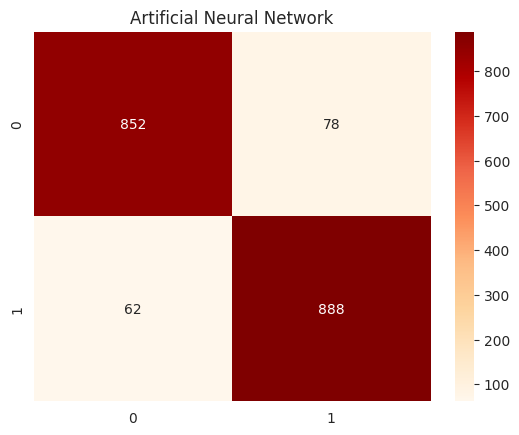

In [ ]:
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
accuracy_score(y_test, y_pred_ann)
ann_report=classification_report(y_test, y_pred_ann)
print(accuracy_score(y_test, y_pred_ann))
sns.heatmap(confusion_matrix(y_test, y_pred_ann),annot=True,cmap='OrRd', fmt='g' )
plt.title('Artificial Neural Network')

In [ ]:
print(ann_report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       930
           1       0.92      0.93      0.93       950

    accuracy                           0.93      1880
   macro avg       0.93      0.93      0.93      1880
weighted avg       0.93      0.93      0.93      1880



# Dictionary of Trained Models

In [ ]:
models = { "Logistic Regression":LR, " Random Forest":RF, "Decision Tree Classification":DTC,"K-Nearest Neighbors (K-NN)":KNN,"Kernel SVM":KSVM,
       "XGBboots" :XGB, "Catboost": CAT , "Tuned Random Forest": best_rf,                # tuned Random Forest
    "Tuned Decision Tree Classification": best_dtc,# tuned Decision Tree
    "Tuned K-Nearest Neighbors (K-NN)": best_knn, # tuned KNN
    "Tuned Kernel SVM": best_svc,                  # tuned SVC
    "Tuned XGBoost": best_xgb, }


# Applying k-Fold Cross Validation on all models

In [ ]:
for names,model, in models.items():
  print(f" Cross validation results {names}")
  k_fold_cross_validation(model,X_train,y_train,15)
  print()

Streaming output truncated to the last 5000 lines.
32:	learn: 0.2459206	total: 176ms	remaining: 5.14s
33:	learn: 0.2405312	total: 181ms	remaining: 5.15s
34:	learn: 0.2361840	total: 186ms	remaining: 5.13s
35:	learn: 0.2312144	total: 191ms	remaining: 5.12s
36:	learn: 0.2275381	total: 196ms	remaining: 5.1s
37:	learn: 0.2248345	total: 201ms	remaining: 5.08s
38:	learn: 0.2210167	total: 206ms	remaining: 5.08s
39:	learn: 0.2172467	total: 211ms	remaining: 5.07s
40:	learn: 0.2134114	total: 216ms	remaining: 5.06s
41:	learn: 0.2096105	total: 221ms	remaining: 5.05s
42:	learn: 0.2067350	total: 227ms	remaining: 5.04s
43:	learn: 0.2040189	total: 236ms	remaining: 5.13s
44:	learn: 0.2003988	total: 241ms	remaining: 5.11s
45:	learn: 0.1973369	total: 246ms	remaining: 5.1s
46:	learn: 0.1949205	total: 251ms	remaining: 5.09s
47:	learn: 0.1920915	total: 256ms	remaining: 5.08s
48:	learn: 0.1890135	total: 261ms	remaining: 5.07s
49:	learn: 0.1856879	total: 266ms	remaining: 5.06s
50:	learn: 0.1832238	total: 271ms

# Evaluating and visualise results.

AttributeError: This 'SVC' has no attribute 'predict_proba'

<Figure size 1000x800 with 0 Axes>

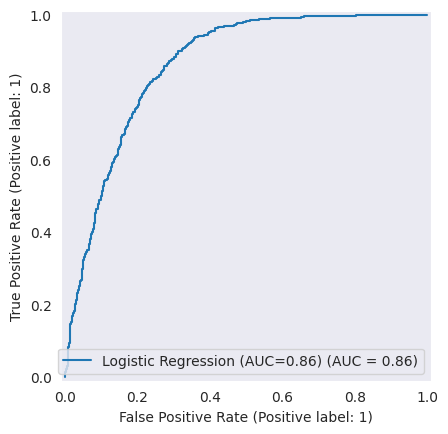

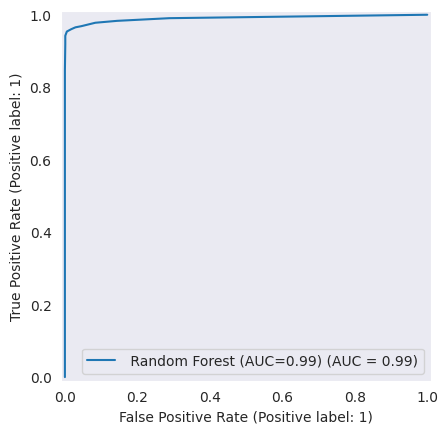

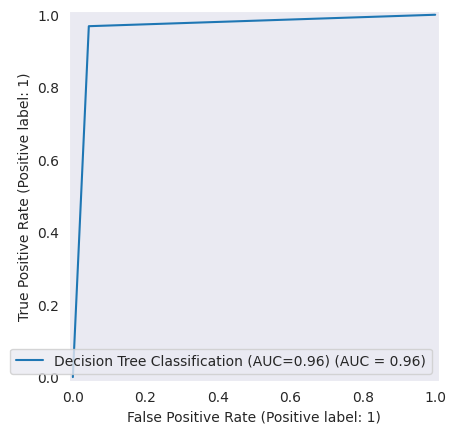

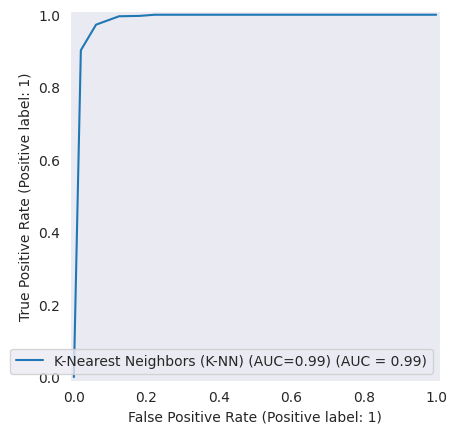

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_proba, name=f"{name} (AUC={roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')  # diagonal
plt.title("ROC Curves for Stroke Prediction Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


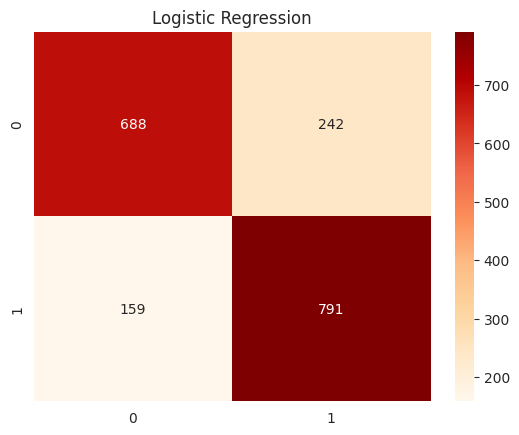

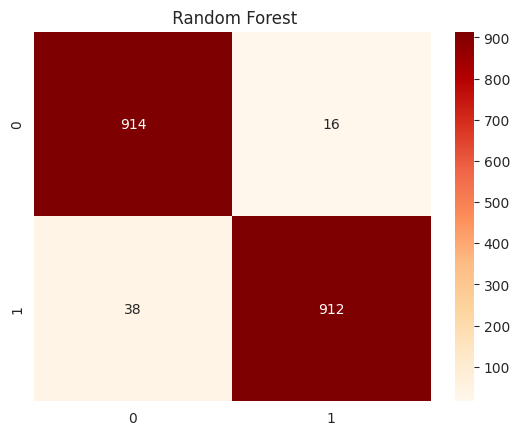

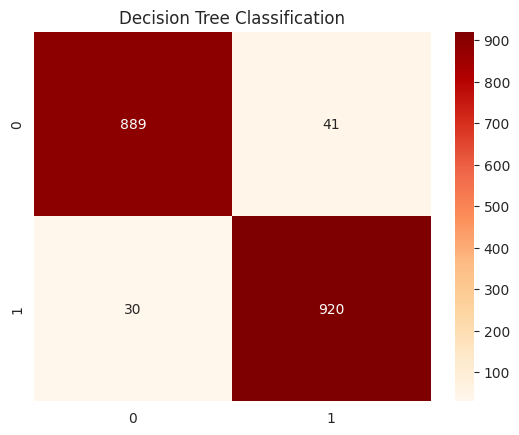

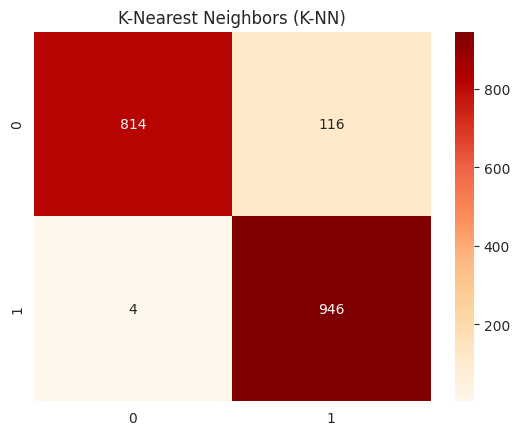

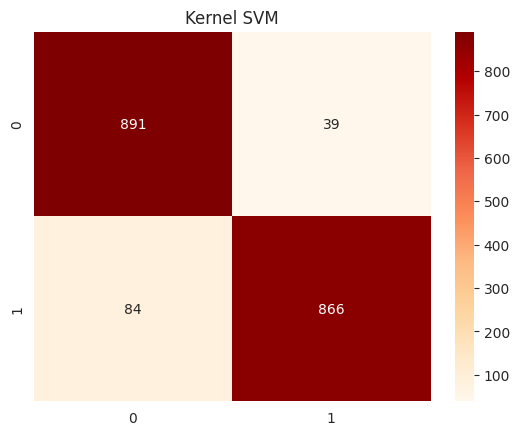

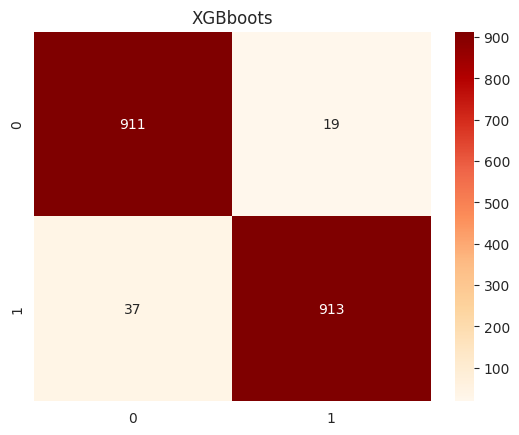

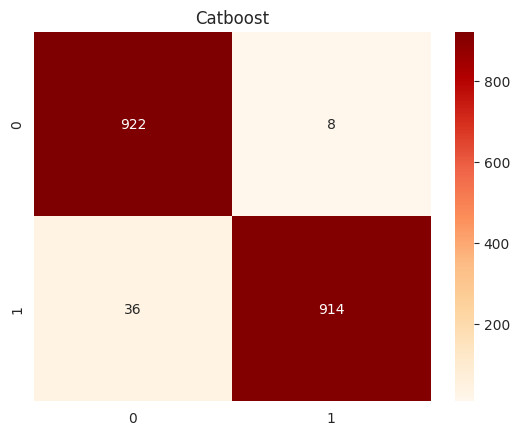

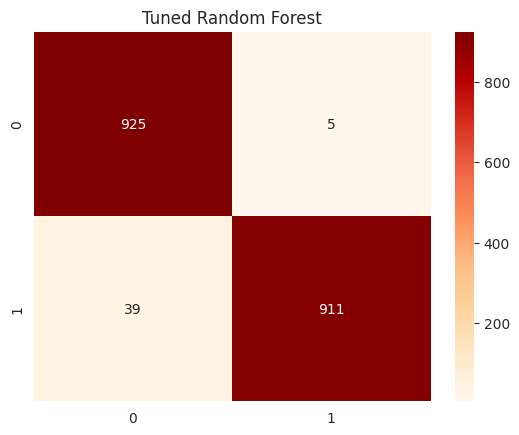

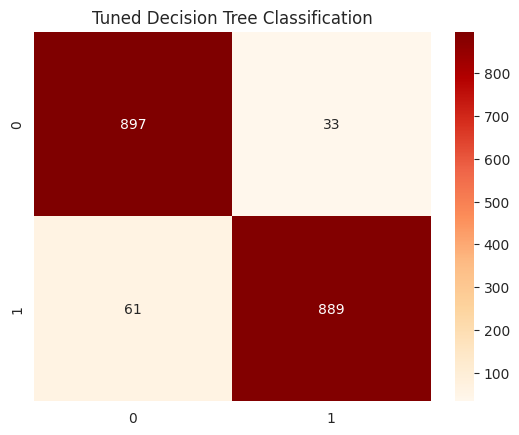

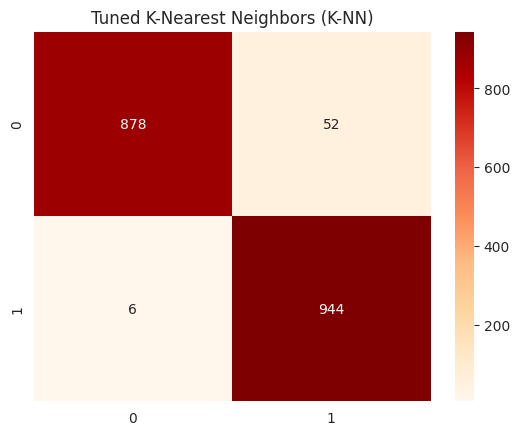

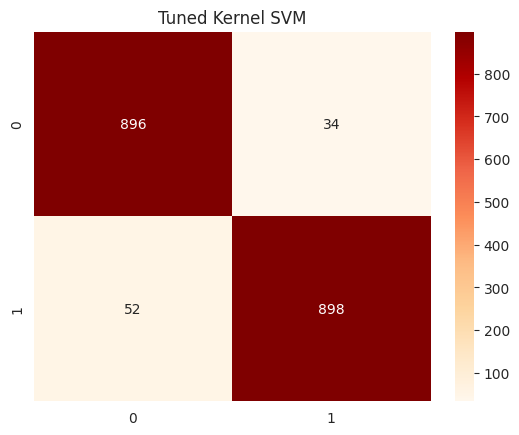

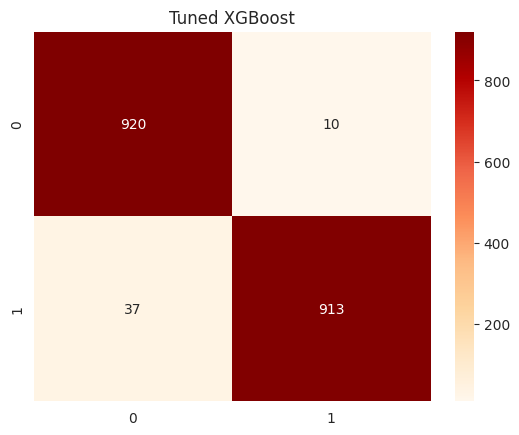

In [ ]:
for names,model, in models.items():
  plt.title(names)
  plot_confusion_matrix(model)


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Initialize a list to store report data
report_list = []

# Loop through models and calculate metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    report_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1-score (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1-score (1)': report['1']['f1-score'],
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-score': report['macro avg']['f1-score']
    })

# Convert to DataFrame
df_report = pd.DataFrame(report_list)
df_report = df_report.sort_values(by='Macro Avg F1-score', ascending=False)  # optional sorting

# Display the table
print(df_report)

                                 Model  Accuracy  Precision (0)  Recall (0)  \
6                             Catboost  0.976596       0.962422    0.991398   
7                  Tuned Random Forest  0.976596       0.959544    0.994624   
11                       Tuned XGBoost  0.975000       0.961338    0.989247   
1                        Random Forest  0.971277       0.960084    0.982796   
5                             XGBboots  0.970213       0.960970    0.979570   
9     Tuned K-Nearest Neighbors (K-NN)  0.969149       0.993213    0.944086   
2         Decision Tree Classification  0.962234       0.967356    0.955914   
10                    Tuned Kernel SVM  0.954255       0.945148    0.963441   
8   Tuned Decision Tree Classification  0.950000       0.936326    0.964516   
3           K-Nearest Neighbors (K-NN)  0.936170       0.995110    0.875269   
4                           Kernel SVM  0.934574       0.913846    0.958065   
0                  Logistic Regression  0.786702    

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from tabulate import tabulate  # pip install tabulate


# Prepare a list for storing metrics
report_list = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    report_list.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision (0)': round(report['0']['precision'], 4),
        'Recall (0)': round(report['0']['recall'], 4),
        'F1-score (0)': round(report['0']['f1-score'], 4),
        'Precision (1)': round(report['1']['precision'], 4),
        'Recall (1)': round(report['1']['recall'], 4),
        'F1-score (1)': round(report['1']['f1-score'], 4),
        'Macro F1-score': round(report['macro avg']['f1-score'], 4)
    })

# Convert to DataFrame
df_report = pd.DataFrame(report_list)

# Sort by Macro F1-score
df_report = df_report.sort_values(by='Accuracy', ascending=False)

# Display as a neat table using tabulate
print(tabulate(df_report, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════════════════════════════╤════════════╤═════════════════╤══════════════╤════════════════╤═════════════════╤══════════════╤════════════════╤══════════════════╕
│ Model                              │   Accuracy │   Precision (0) │   Recall (0) │   F1-score (0) │   Precision (1) │   Recall (1) │   F1-score (1) │   Macro F1-score │
╞════════════════════════════════════╪════════════╪═════════════════╪══════════════╪════════════════╪═════════════════╪══════════════╪════════════════╪══════════════════╡
│ Catboost                           │     0.9766 │          0.9624 │       0.9914 │         0.9767 │          0.9913 │       0.9621 │         0.9765 │           0.9766 │
├────────────────────────────────────┼────────────┼─────────────────┼──────────────┼────────────────┼─────────────────┼──────────────┼────────────────┼──────────────────┤
│ Tuned Random Forest                │     0.9766 │          0.9595 │       0.9946 │         0.9768 │          0.9945 │       0.9589 │         0.

╒════════════════════════════════════╤════════════╤═════════════════╤══════════════╤════════════════╤═════════════════╤══════════════╤════════════════╤══════════════════╕
│ Model                              │   Accuracy │   Precision (0) │   Recall (0) │   F1-score (0) │   Precision (1) │   Recall (1) │   F1-score (1) │   Macro F1-score │
╞════════════════════════════════════╪════════════╪═════════════════╪══════════════╪════════════════╪═════════════════╪══════════════╪════════════════╪══════════════════╡
│ Catboost                           │     0.9766 │          0.9624 │       0.9914 │         0.9767 │          0.9913 │       0.9621 │         0.9765 │           0.9766 │
├────────────────────────────────────┼────────────┼─────────────────┼──────────────┼────────────────┼─────────────────┼──────────────┼────────────────┼──────────────────┤
│ Tuned Random Forest                │     0.9766 │          0.9595 │       0.9946 │         0.9768 │          0.9945 │       0.9589 │         0.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
dataset_clean = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Clean dataset
dataset_clean = dataset_clean.dropna()
dataset_clean = dataset_clean.drop('id', axis=1)
dataset_clean.drop(dataset_clean.loc[dataset_clean['gender']=='Other'].index, inplace=True)
dataset_clean.age = dataset_clean.age.round().astype('int')

# Features and target
X = dataset_clean.iloc[:, :-1]
y = dataset_clean.iloc[:, -1].values

# Columns for encoding
label_cols = ['gender', 'ever_married', 'Residence_type']
ohe_cols = ['work_type', 'smoking_status']

# Apply LabelEncoder manually
X_copy = X.copy()
le = LabelEncoder()
for col in label_cols:
    X_copy[col] = le.fit_transform(X_copy[col])

# ColumnTransformer for OneHotEncoder
ohe_indices = [X_copy.columns.get_loc(col) for col in ohe_cols]
ct = ColumnTransformer(
    transformers=[('ohe', OneHotEncoder(), ohe_indices)],
    remainder='passthrough'
)

# Transform
X_transformed = ct.fit_transform(X_copy)

# Get feature names and clean them
feature_names = ct.get_feature_names_out()
# Remove 'ohe__' or 'remainder__' prefixes
feature_names_clean = [name.split("__")[-1] for name in feature_names]

# Convert to DataFrame
X_df = pd.DataFrame(X_transformed, columns=feature_names_clean)

# Check results
print("Clean column names:")
print(X_df.columns.tolist())
print("\nFirst 5 rows:")
print(X_df.head())


Clean column names:
['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi']

First 5 rows:
   work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                 0.0                     0.0                1.0   
1                 0.0                     0.0                1.0   
2                 0.0                     0.0                1.0   
3                 0.0                     0.0                0.0   
4                 0.0                     0.0                1.0   

   work_type_Self-employed  work_type_children  smoking_status_Unknown  \
0                      0.0                 0.0                     0.0   
1                      0.0                 0.0               

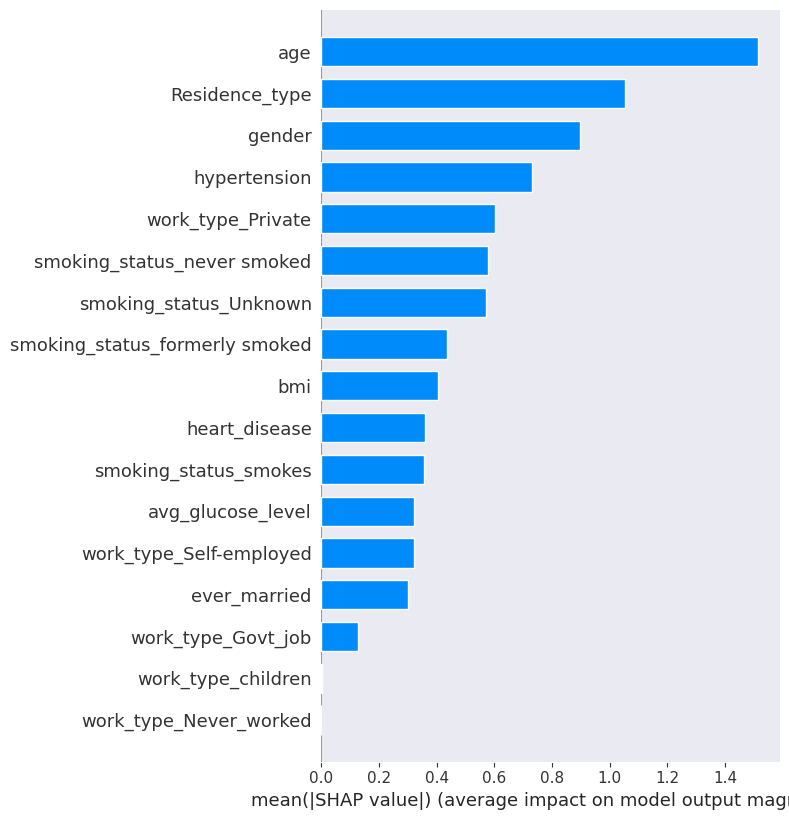

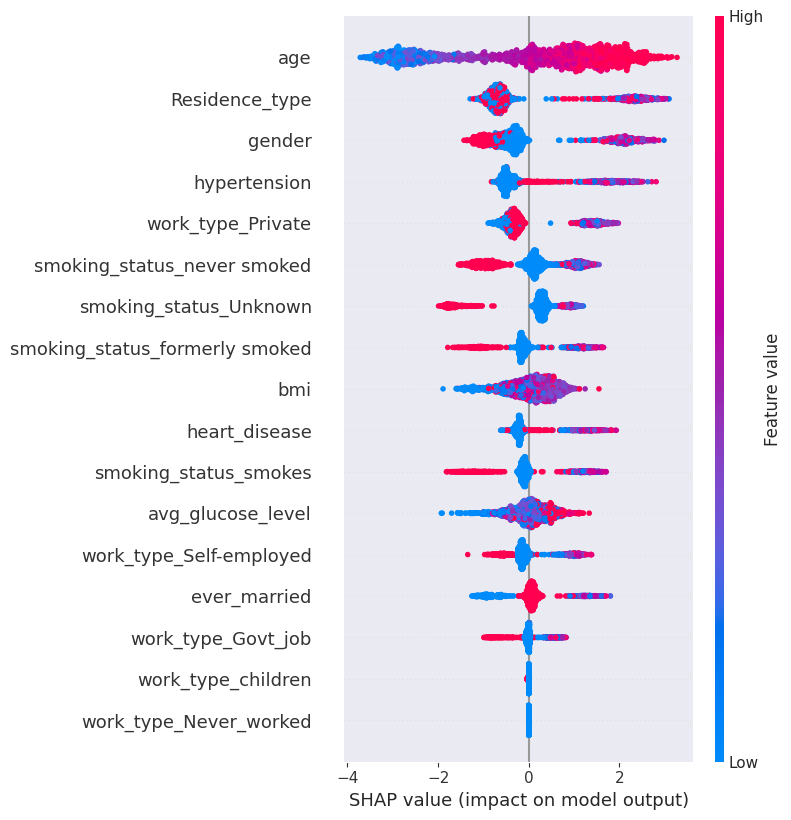

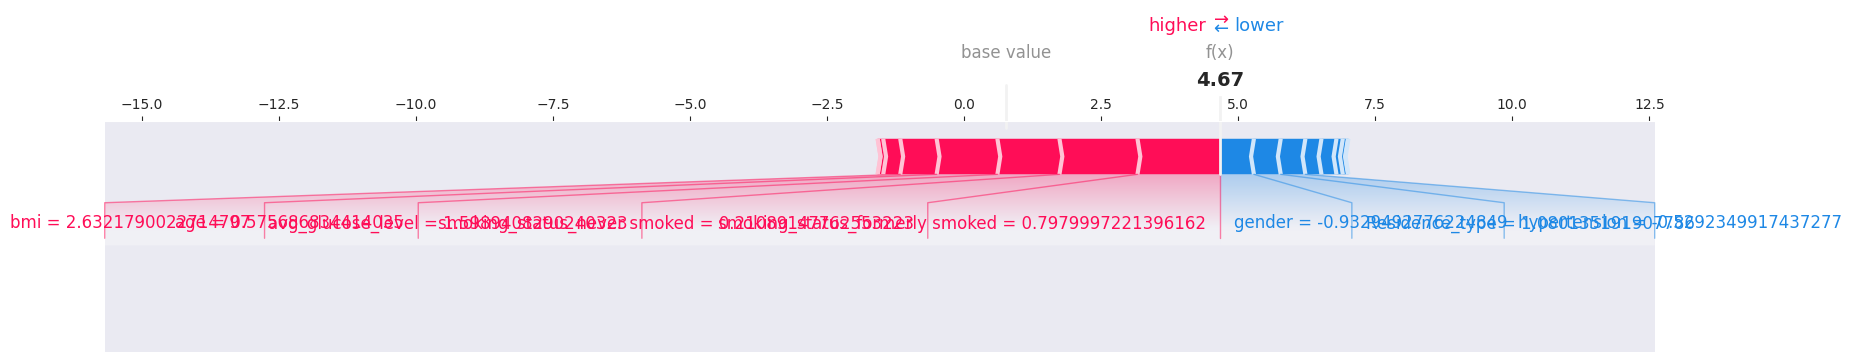

In [ ]:
import shap
import matplotlib.pyplot as plt

# Ensure X_test is a DataFrame with proper feature names
X_test_df = pd.DataFrame(X_test, columns=X_df.columns)

# Use CatBoost model (best tuned one)
model = CAT  # replace with your tuned CatBoost if needed

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_df)

# Global feature importance (bar plot)
plt.figure(figsize=(12,6))
shap.summary_plot(shap_values, X_test_df, feature_names=X_test_df.columns, plot_type="bar", show=True)

# Beeswarm plot (detailed impact)
plt.figure(figsize=(12,6))
shap.summary_plot(shap_values, X_test_df, feature_names=X_test_df.columns, show=True)

# Optional: explain a single prediction (first patient)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_df.iloc[0,:], feature_names=X_test_df.columns, matplotlib=True)


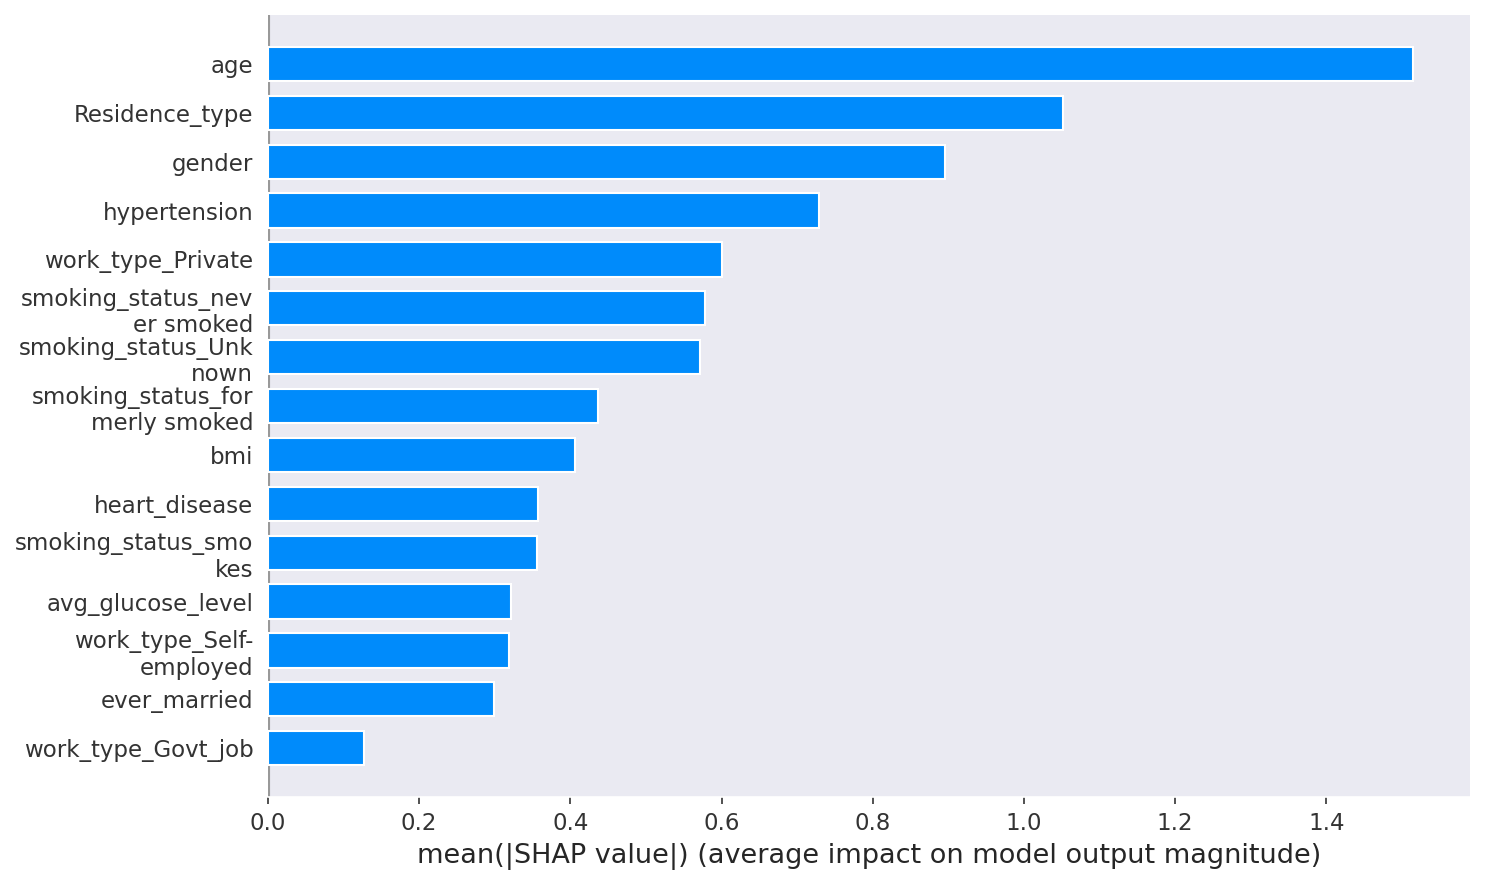

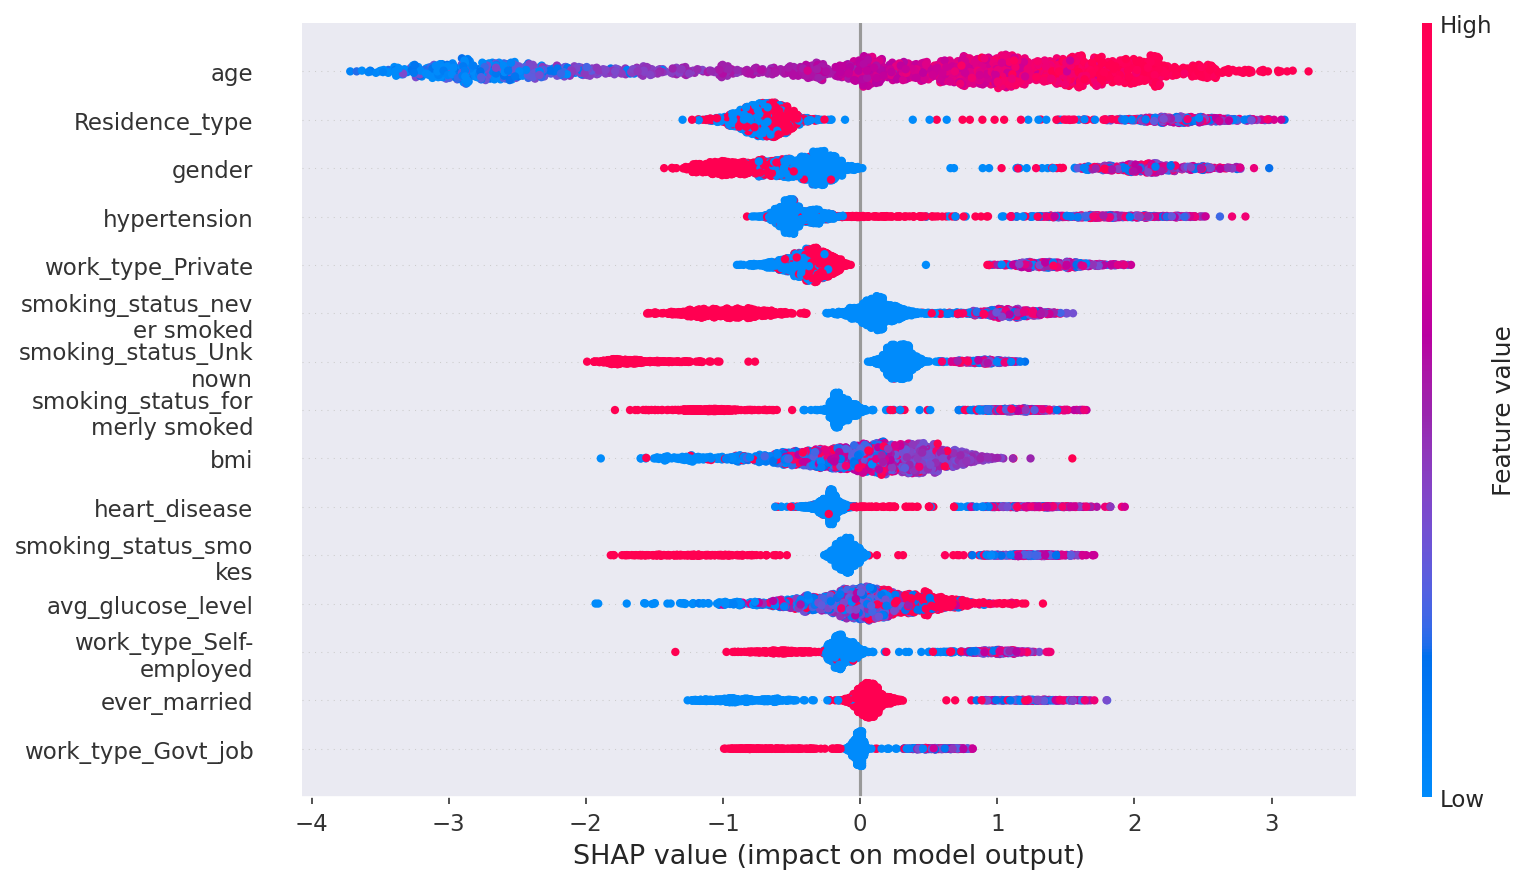

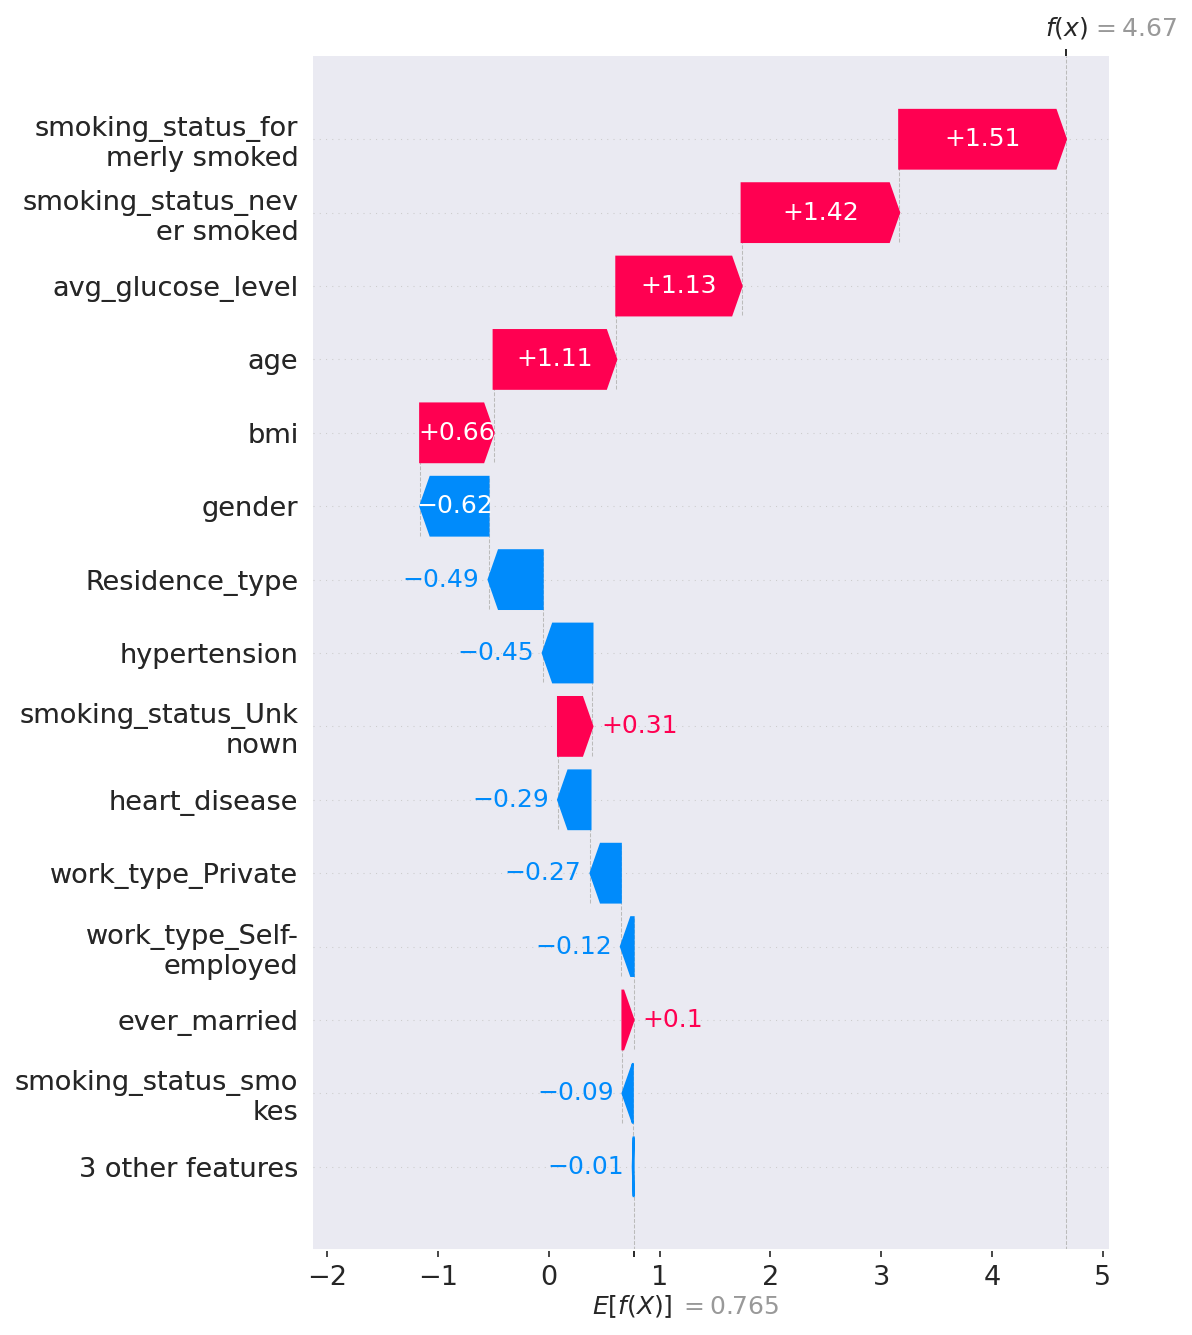

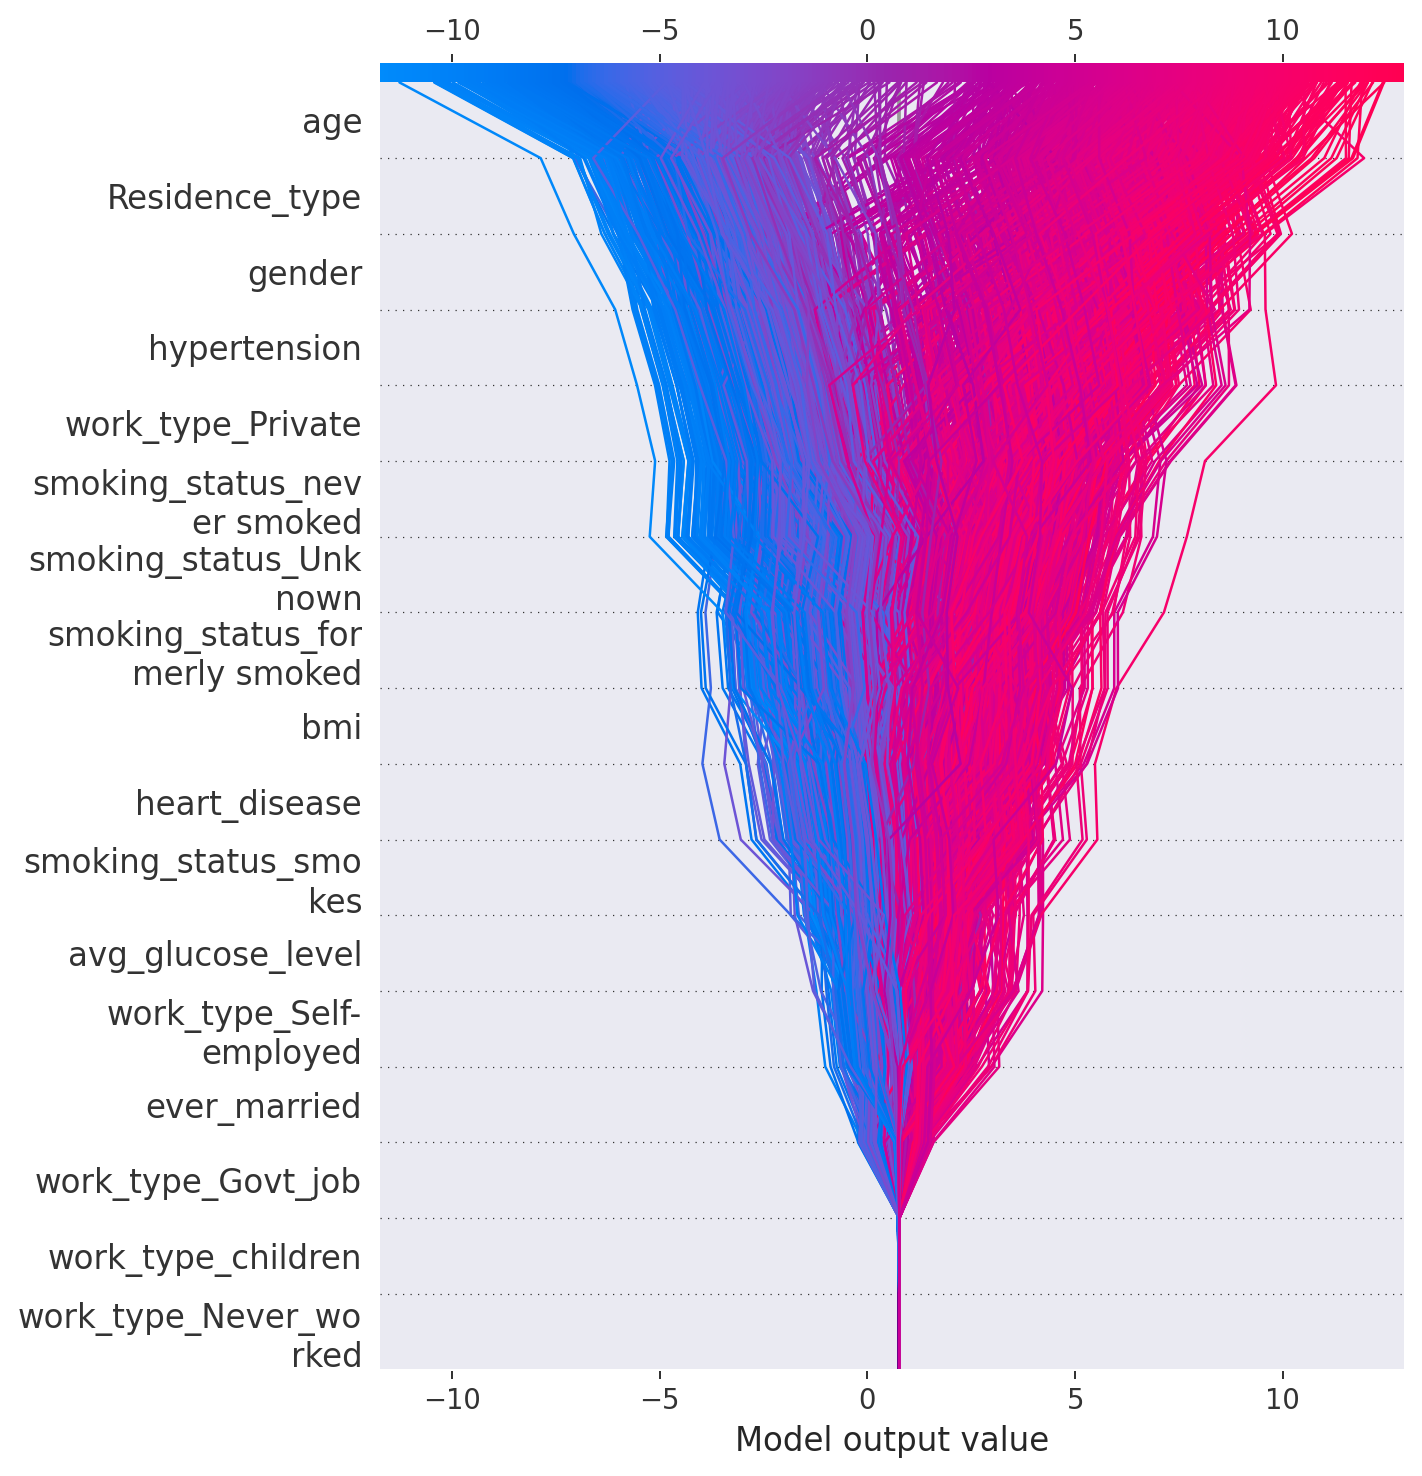

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Ensure DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_df.columns)

# Optional: shorten long column names for plots
def shorten(name, width=18):
    return "\n".join(textwrap.wrap(str(name), width))

short_cols = [shorten(c) for c in X_test_df.columns]
X_test_df_short = X_test_df.copy()
X_test_df_short.columns = short_cols

# Explainer
explainer = shap.TreeExplainer(CAT)
shap_values = explainer.shap_values(X_test_df)

# 1) Bar summary (global importance)
plt.figure(figsize=(10, 6), dpi=150)
shap.summary_plot(
    shap_values,
    X_test_df_short,
    feature_names=X_test_df_short.columns,
    plot_type="bar",
    max_display=15,              # show top 15
    plot_size=(10, 6),
    show=False
)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# 2) Beeswarm (distribution of impacts)
plt.figure(figsize=(11, 6), dpi=150)
shap.summary_plot(
    shap_values,
    X_test_df_short,
    feature_names=X_test_df_short.columns,
    max_display=15,              # reduce clutter
    plot_size=(11, 6),
    color_bar=True,
    show=False
)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# 3) Single prediction explanation (waterfall is cleaner than force for static)
i = 0  # index to inspect
sv = shap_values[i]
base_val = explainer.expected_value

plt.figure(figsize=(9, 7), dpi=150)
shap.plots._waterfall.waterfall_legacy(
    base_val,
    sv,
    feature_names=X_test_df_short.columns,
    max_display=15,             # top effects
    show=False
)
plt.tight_layout()
plt.show()

# 4) Optional: decision plot (ordered, non-overlapping)
plt.figure(figsize=(10, 6), dpi=180)
shap.decision_plot(
    base_val,
    shap_values,
    feature_names=short_cols,
    feature_order='importance',
    show=False
)
plt.tight_layout()
plt.show()


In [79]:
"""import joblib
# Save trained CatBoost model
joblib.dump(CAT, 'catboost_stroke_model.pkl')

# Save transformer used for preprocessing
joblib.dump(ct, 'stroke_transformer.pkl')

print("Model and transformer saved successfully!")"""

'import joblib\n# Save trained CatBoost model\njoblib.dump(CAT, \'catboost_stroke_model.pkl\')\n\n# Save transformer used for preprocessing\njoblib.dump(ct, \'stroke_transformer.pkl\')\n\nprint("Model and transformer saved successfully!")'

In [81]:
"""import joblib

# Save the ColumnTransformer
joblib.dump(ct, 'preprocessor.pkl')
"""

"import joblib\n\n# Save the ColumnTransformer\njoblib.dump(ct, 'preprocessor.pkl')\n"

In [78]:
"""model.save_model("catboost_stroke_model.cbm")
"""

'model.save_model("catboost_stroke_model.cbm")\n'

# Task
Save the trained CatBoost model and the preprocessing steps, then explain how to deploy the model.

## Save the trained catboost model

### Subtask:
Save the trained CatBoost model to a file.


**Reasoning**:
Save the trained CatBoost model to a file using its built-in method.



In [ ]:
CAT.save_model("catboost_stroke_model.cbm")

## Save the preprocessing steps

### Subtask:
Save the `ColumnTransformer` and `StandardScaler` used during preprocessing.


**Reasoning**:
Save the ColumnTransformer and StandardScaler objects using joblib.



In [ ]:
import joblib

joblib.dump(ct, 'column_transformer.pkl')
joblib.dump(sc, 'standard_scaler.pkl')

['standard_scaler.pkl']